In [1]:
import time, numpy as np, math

**test examples first!**

**beware edge cases**

***stop typoing so much***

24a

In [45]:
NAME2STEP={
    '^':(-1,0),'v':(1,0),
    '<':(0,-1),'>':(0,1),
}
def parse():
    with open('in.txt') as f:
        lines=f.read().split('\n')
    R,C=len(lines),len(lines[0])
    arrows={(r,c,lines[r][c])
            for r,row in enumerate(lines)
            for c,ch in enumerate(row) if ch in NAME2STEP}
    board=[]
    for l in lines:
        nl=l
        for name in NAME2STEP:
            nl=nl.replace(name,'.')
        board.append(list(nl))
    return R,C,board,arrows

R,C,board,arrows=parse()
start=[(0,c) for c in range(C) if board[0][c]=='.'][0]
end=[(R-1,c) for c in range(C) if board[R-1][c]=='.'][0]
#R,C,board,arrows,start,end
print(start,end)
reachable=[ {start} ]
while True:
    n_arrows=set()
    for r,c,name in arrows:
        step=NAME2STEP[name]
        nr,nc=r+step[0],c+step[1]
        if board[nr][nc]=='#':
            nr=1 if nr==R-1 else R-2 if nr==0 else nr
            nc=1 if nc==C-1 else C-2 if nc==0 else nc
        n_arrows.add((nr,nc,name))
    locs={(r,c) for r,c,name in n_arrows}
    arrows=n_arrows
    
    dp=set()
    for r,c in reachable[-1]:
        if (r,c) not in locs:
            dp.add((r,c))
        for step in NAME2STEP.values():
            nr,nc=r+step[0],c+step[1]
            if (0<=nr and nr<R and 0<=nc and nc<C
                and board[nr][nc]=='.'
                and (nr,nc) not in locs):
                dp.add((nr,nc))
    reachable.append(dp)
    if end in dp:
        print(len(reachable)-1)
        break
#len(reachable),reachable

(0, 1) (36, 100)
242


24b

In [53]:
R,C,board,arrows=parse()
start=[(0,c) for c in range(C) if board[0][c]=='.'][0]
end=[(R-1,c) for c in range(C) if board[R-1][c]=='.'][0]
#R,C,board,arrows,start,end
print(start,end)
reachable=[ {(*start,0)} ]
while True:
    n_arrows=set()
    for r,c,name in arrows:
        step=NAME2STEP[name]
        nr,nc=r+step[0],c+step[1]
        if board[nr][nc]=='#':
            nr=1 if nr==R-1 else R-2 if nr==0 else nr
            nc=1 if nc==C-1 else C-2 if nc==0 else nc
        n_arrows.add((nr,nc,name))
    locs={(r,c) for r,c,name in n_arrows}
    arrows=n_arrows
    
    dp=set()
    for r,c,goal in reachable[-1]:
        if (r,c) not in locs:
            dp.add((r,c,goal))
        for step in NAME2STEP.values():
            nr,nc=r+step[0],c+step[1]
            if (0<=nr and nr<R and 0<=nc and nc<C
                and board[nr][nc]=='.'
                and (nr,nc) not in locs):
                ngoal=(goal+1
                       if (nr,nc)==(end if goal in {0,2} else start)
                       else goal)
                dp.add((nr,nc,ngoal))
    reachable.append(dp)
    #print(dp)
    if (*end,3) in dp:
        print(len(reachable)-1)
        break
#len(reachable),reachable

(0, 1) (36, 100)
720


23a

In [4]:
vec_sum=lambda a,b:(a[0]+b[0],a[1]+b[1])
NAME2STEP={
    'N':(-1,0),'S':(1,0),
    'W':(0,-1),'E':(0,1),
}
for da,db in ['NW','NE','SW','SE']:
    NAME2STEP[da+db]=vec_sum(NAME2STEP[da],NAME2STEP[db])
NAME2STEP

{'N': (-1, 0),
 'S': (1, 0),
 'W': (0, -1),
 'E': (0, 1),
 'NW': (-1, -1),
 'NE': (-1, 1),
 'SW': (1, -1),
 'SE': (1, 1)}

In [41]:
def parse():
    with open('in.txt') as f:
        lines=f.read().split('\n')
    return {(r,c)
         for r,row in enumerate(lines)
         for c,ch in enumerate(row) if ch=='#'}
def draw(pts,R,C):
    return '\n'.join(
        ''.join('#' if (r,c) in pts else '.' for c in range(C))
        for r in range(R)
    )+'\n____'

pts=parse()
#print(draw(pts,12,14))
pdirs=['N','S','W','E']
for r in range(10):
    dests={}
    for pt in pts:
        if any(vec_sum(pt,step) in pts
               for step in NAME2STEP.values()):
            for _ in range(4):
                d=pdirs[(r+_)%4]
                npt=vec_sum(pt,NAME2STEP[d])
                if all(vec_sum(pt,NAME2STEP[d1]) not in pts
                       for d1 in NAME2STEP if d in d1
                      ):
                    dests[pt]=npt
                    break
    for pt in pts:
        if pt not in dests:
            dests[pt]=pt
    #print(dests)
    freqs={}
    for e in dests.values():
        freqs[e]=freqs.get(e,0)+1
    npts={dests[pt] if freqs[dests[pt]]==1
          else pt
         for pt in pts}
    if pts==npts:
        break
    pts=npts
    #print(r)
    #print(draw(pts,12,14))
R=(max(r for r,c in pts)-min(r for r,c in pts)+1)
C=(max(c for r,c in pts)-min(c for r,c in pts)+1)
print(R,C)
R*C-len(pts)

80 80


3920

23b

In [45]:
pts=parse()
#print(draw(pts,12,14))
pdirs=['N','S','W','E']
r=0
st,mark=time.time(),0
while True:
    dests={}
    for pt in pts:
        if any(vec_sum(pt,step) in pts
               for step in NAME2STEP.values()):
            for _ in range(4):
                d=pdirs[(r+_)%4]
                npt=vec_sum(pt,NAME2STEP[d])
                if all(vec_sum(pt,NAME2STEP[d1]) not in pts
                       for d1 in NAME2STEP if d in d1
                      ):
                    dests[pt]=npt
                    break
    for pt in pts:
        if pt not in dests:
            dests[pt]=pt
    #print(dests)
    freqs={}
    for e in dests.values():
        freqs[e]=freqs.get(e,0)+1
    npts={dests[pt] if freqs[dests[pt]]==1
          else pt
         for pt in pts}
    if pts==npts:
        print(r+1)
        break
    pts=npts
    #print(r)
    #print(draw(pts,12,14))
    r+=1
    t=time.time()-st
    if t>=mark:
        print(f'{t=} {r=}')
        mark+=10 if mark<100 else 100

t=0.02116084098815918 r=1
t=10.006547927856445 r=838
889


22a

In [45]:
def parse():
    with open('in.txt') as f:
        lines=f.read().split('\n')
    pathstr=lines[-1]
    pcs=pathstr.split('L')
    path=[]
    for i,pc in enumerate(pcs):
        if i>0:
            path.append('L')
        for j,spc in enumerate(pc.split('R')):
            if j>0:
                path.append('R')
            path.append(int(spc))
    board=[' '+l for l in lines[:-2]]
    C=max(len(l) for l in board)
    board=[' '*C]+[l+' '*(C-len(l)) for l in board]
    return [list(l) for l in board],path

board,path=parse()
R,C=len(board),len(board[0])
within=lambda r,c:0<=r and r<R and 0<=c and c<C
valid=lambda r,c:within(r,c) and board[r][c]!=' '
free=lambda r,c:within(r,c) and board[r][c]=='.'

DR,DC=[0,1,0,-1],[1,0,-1,0]
neighbors={(r,c):[None]*4
           for r in range(R) for c in range(C)
           if free(r,c)}
for r in range(R):
    for c in range(C):
        if free(r,c):
            for d in range(4):
                nr,nc=r+DR[d],c+DC[d]
                if not(valid(nr,nc)):
                    nr,nc=r,c
                    while valid(nr,nc):
                        nr,nc=nr-DR[d],nc-DC[d]
                    nr,nc=nr+DR[d],nc+DC[d]
                neighbors[(r,c)][d]=(nr,nc)

pt=sorted(neighbors.keys())[0]
d=0
for instr in path:
    if instr=='L':
        d=(d-1)%4
    elif instr=='R':
        d=(d+1)%4
    else:
        for _ in range(instr):
            npt=neighbors[pt][d]
            if not(free(*npt)):
                break
            pt=npt
print(pt,d)
1000*pt[0]+4*pt[1]+d

(117, 13) 2


117054

22b

In [92]:
#a lot of hardcoding
board,path=parse()
board=[row[1:] for row in board[1:]]
N=len(board)//4

R,C=len(board),len(board[0])
within=lambda r,c:0<=r and r<R and 0<=c and c<C
valid=lambda r,c:within(r,c) and board[r][c]!=' '
free=lambda r,c:within(r,c) and board[r][c]=='.'

DR,DC=[0,1,0,-1],[1,0,-1,0]
ahead={}
for r in range(R):
    for c in range(C):
        if free(r,c):
            for d in range(4):
                nr,nc,nd=r+DR[d],c+DC[d],d
#                 if not(valid(nr,nc)):
#                     nr,nc=r,c
#                     while valid(nr,nc):
#                         nr,nc=nr-DR[d],nc-DC[d]
#                     nr,nc=nr+DR[d],nc+DC[d]
#                 ahead[(r,c,d)]=(nr,nc,nd)
                ahead[(r,c,d)]=(nr,nc,nd) if valid(nr,nc) else None

def flip(s):
    r,c,d=s
    return r,c,(d+2)%4
def modify(pairs):
    for sa,sb in pairs:
        #assert sa in ahead
        assert len(sa)==3 and len(sb)==3
        ahead[sa]=sb
        ahead[flip(sb)]=flip(sa)

modify(( (N-1,2*N+i,1) , (N+i,2*N-1,2) ) for i in range(N))
modify(( (2*N,i,3) , (N+i,N,0) ) for i in range(N))
modify(( (3*N-1,N+i,1) , (3*N+i,N-1,2) ) for i in range(N))

modify(( (N-1-i,3*N-1,0) , (2*N+i,2*N-1,2) ) for i in range(N))
modify(( (2*N+i,0,2) , (N-1-i,N,0) ) for i in range(N))

modify(( (3*N+i,0,2) , (0,N+i,1) ) for i in range(N))
modify(( (4*N-1,i,1) , (0,2*N+i,1) ) for i in range(N))

display(ahead)
print({k for k,v in ahead.items() if v is None})
assert all(v is not None for v in ahead.values())

state=sorted(ahead.keys())[0]
for instr in path:
    if type(instr)==int:
        for _ in range(instr):
            nstate=ahead[state]
            if not(free(*nstate[:2])):
                break
            state=nstate
    else:
        r,c,d=state
        if instr=='L':
            d=(d-1)%4
        else:
            assert instr=='R'
            d=(d+1)%4
        state=r,c,d
        
print(state)
1000*(state[0]+1)+4*(state[1]+1)+state[2]

{(0, 50, 0): (0, 51, 0),
 (0, 50, 1): (1, 50, 1),
 (0, 50, 2): (149, 0, 0),
 (0, 50, 3): (150, 0, 0),
 (0, 51, 0): (0, 52, 0),
 (0, 51, 1): (1, 51, 1),
 (0, 51, 2): (0, 50, 2),
 (0, 51, 3): (151, 0, 0),
 (0, 52, 0): (0, 53, 0),
 (0, 52, 1): (1, 52, 1),
 (0, 52, 2): (0, 51, 2),
 (0, 52, 3): (152, 0, 0),
 (0, 53, 0): (0, 54, 0),
 (0, 53, 1): (1, 53, 1),
 (0, 53, 2): (0, 52, 2),
 (0, 53, 3): (153, 0, 0),
 (0, 54, 0): (0, 55, 0),
 (0, 54, 1): (1, 54, 1),
 (0, 54, 2): (0, 53, 2),
 (0, 54, 3): (154, 0, 0),
 (0, 55, 0): (0, 56, 0),
 (0, 55, 1): (1, 55, 1),
 (0, 55, 2): (0, 54, 2),
 (0, 55, 3): (155, 0, 0),
 (0, 57, 0): (0, 58, 0),
 (0, 57, 1): (1, 57, 1),
 (0, 57, 2): (0, 56, 2),
 (0, 57, 3): (157, 0, 0),
 (0, 58, 0): (0, 59, 0),
 (0, 58, 1): (1, 58, 1),
 (0, 58, 2): (0, 57, 2),
 (0, 58, 3): (158, 0, 0),
 (0, 59, 0): (0, 60, 0),
 (0, 59, 1): (1, 59, 1),
 (0, 59, 2): (0, 58, 2),
 (0, 59, 3): (159, 0, 0),
 (0, 60, 0): (0, 61, 0),
 (0, 60, 1): (1, 60, 1),
 (0, 60, 2): (0, 59, 2),
 (0, 60, 3): (1

set()
(161, 23, 0)


162096

In [81]:
flip((0,0,0))

(0, 0, 2)

In [83]:
states=[
    (N-1,2*N,1),
    (2*N,0,3),(2*N,18,3),(N+18,)
    (3*N-1,N,1),
    
    (N-1,3*N-1,0),
    (N,0,2),
    
    (3*N,0,2),
    (4*N-1,0,1)
]
for st in states:
    print(st,'-->',ahead[st])

(49, 100, 1) --> (50, 99, 2)
(100, 0, 3) --> (50, 0, 0)
(100, 18, 3) --> (68, 0, 0)
(149, 50, 1) --> None
(49, 149, 0) --> None
(50, 0, 2) --> (100, 0, 1)
(150, 0, 2) --> None
(199, 0, 1) --> None


21a

In [6]:
def parse():
    with open('in.txt') as f:
        out={}
        for l in f.read().split('\n'):
            k,expr=l.split(': ')
            out[k]=expr.split(' ')
    return out
info=parse()
vals={}
def solve(k):
    if k in vals:
        return vals
    expr=info[k]
    if len(expr)==1:
        return int(expr[0])
    assert len(expr)==3
    a,op,b=expr
    va,vb=solve(a),solve(b)
    ret=(va+vb if op=='+'
            else va-vb if op=='-'
            else va*vb if op=='*'
            else va/vb)
    info[k]=ret
    #^^^^ should be 'vals[k]=ret'
    #     but code still runs in linear time
    #     (memoization is actually not needed
    #          since keys are related by a tree structure)
    return ret
solve('root')

70674280581468.0

21b

In [14]:
Poly=np.polynomial.Polynomial

In [20]:
info=parse()
polys={}
def solve(k):
    if k=='humn':
        return Poly([0,1])
    if k in polys:
        return polys[k]
    expr=info[k]
    if len(expr)==1:
        return int(expr[0])
    assert len(expr)==3
    a,op,b=expr
    va,vb=solve(a),solve(b)
    ret=(va+vb if op=='+'
            else va-vb if op=='-'
            else va*vb if op=='*'
            else va/vb)
    polys[k]=ret
    return ret
solve('hppd')-solve('czdp')

Polynomial([ 3.16547278e+13, -9.75967347e+00], domain=[-1.,  1.], window=[-1.,  1.])

In [21]:
31654727831500.72/9.759673469387758

3243420789720.9985

20a

In [28]:
def parse():
    with open('in.txt') as f:
        return list(map(int,f.read().split('\n')))

A=parse()
#print(A)
n=len(A)
I=list(range(n))
def swap(A,i,j):
    A[i],A[j]=A[j],A[i]
def mv(loc,sh):
    global I
    if sh>0:
        cnt=0
        for _ in range(sh):
            nloc=(loc+1)%n
            swap(I,loc,nloc)
            if nloc==0:
                cnt+=1
            loc=nloc
        for _ in range(cnt):
            I=[I[-1]]+I[:-1]
    elif sh<0:
        cnt=0
        for _ in range(-sh):
            nloc=(loc-1)%n
            swap(I,loc,nloc)
            if loc==0:
                cnt+=1
            loc=nloc
        if loc==0: cnt+=1
        for _ in range(cnt):
            I=I[1:]+[I[0]]
for v in range(n):
    loc=0
    while I[loc]!=v:
        loc+=1
    mv(loc,A[I[loc]])
    #print(I,[A[v] for v in I])
A=[A[v] for v in I]
#print(A)
IDXS=[1000,2000,3000]
loc0=0
while A[loc0]!=0: loc0+=1
print(f'{loc0=}')
nums=[A[(loc0+idx)%n] for idx in IDXS]
print(nums)
sum(nums)

loc0=4669
[9573, 1824, 7673]


19070

20b

In [ ]:
1, 2, -2, -3, 0, 3, 4
1, -2, 2, -3, 0, 3, 4
-2, 1, 2, -3, 0, 3, 4 --> 1, 2, -3, 0, 3, 4, -2

In [35]:
def parse():
    with open('in.txt') as f:
        return list(map(int,f.read().split('\n')))

A=[811589153*v for v in parse()]
#print(A)
n=len(A)
I=list(range(n))
def swap(A,i,j):
    A[i],A[j]=A[j],A[i]
def mv(loc,sh):
    global I
    sh%=n-1
    if sh>0:
        cnt=0
        for _ in range(sh):
            nloc=(loc+1)%n
            swap(I,loc,nloc)
            if nloc==0:
                cnt+=1
            loc=nloc
        for _ in range(cnt):
            I=[I[-1]]+I[:-1]
    elif sh<0:
        cnt=0
        for _ in range(-sh):
            nloc=(loc-1)%n
            swap(I,loc,nloc)
            if loc==0:
                cnt+=1
            loc=nloc
        if loc==0: cnt+=1
        for _ in range(cnt):
            I=I[1:]+[I[0]]
for rep in range(10):
    for v in range(n):
        loc=0
        while I[loc]!=v:
            loc+=1
        mv(loc,A[I[loc]])
        #print(I,[A[v] for v in I])
    #print([A[v] for v in I])
A=[A[v] for v in I]
#print(A)
IDXS=[1000,2000,3000]
loc0=0
while A[loc0]!=0: loc0+=1
print(f'{loc0=}')
nums=[A[(loc0+idx)%n] for idx in IDXS]
print(nums)
sum(nums)

loc0=4713
[1370774079417, 8039602149618, 5362981123024]


14773357352059

19a

In [84]:
def parse():
    with open('in.txt') as f:
        info=[]
        for l in f.read().split('\n'):
            t=l.split(' ')
            info.append(
                tuple(map(int,
                          (t[1][:-1],t[6],t[12],t[18],t[21],t[27],t[30])
                ))
            )
    return info
info=parse()
out=0
for b_id,orc,clc,obco,obcc,geco,gecb in info:
    print(b_id,orc,clc,obco,obcc,geco,gecb)
    acts=[
        (0,0,0,0, 0,0,0,0),
        (-orc,0,0,0, 1,0,0,0),
        (-clc,0,0,0, 0,1,0,0),
        (-obco,-obcc,0,0, 0,0,1,0),
        (-geco,0,-gecb,0, 0,0,0,1)
    ]
    dp={}
    stats=[time.time(),0,0]
    def solve(dur,nor,ncl,nob,nge, norr,nclr,nobr,nger):
        tm=time.time()-stats[0]
        if tm>=stats[1]:
            print(f'{tm=} work={stats[2]} {len(dp)=}')
            stats[1]+=10
        stats[2]+=1
        if dur<=0:
            return nge
        state=(dur,nor,ncl,nob,nge, norr,nclr,nobr,nger)
        if state in dp:
            return dp[state]
        rets=[]
        for act in acts:
            nstate=[dur-1]+[v+a for v,a in zip(state[1:],act)]
            if all(nv>=0 for nv in nstate[1:]):
                for i in range(1,5):
                    nstate[i]+=state[i+4]
                nstate=tuple(nstate)
                rets.append(solve(*nstate))
        ret=max(rets)
        dp[state]=ret
        return ret
    bnge=solve(24,0,0,0,0, 1,0,0,0)
    print('\t',bnge)
    print(f'tm={time.time()-stats[0]} work={stats[2]} {len(dp)=}')
    #print('\t'*2,solve(5,3,21,5,1, 1,4,2,1))  #10,3,15,3,0, 1,4,1,0)) #1,5,37,6,7, 1,4,2,2))
    out+=b_id*bnge
    #display(dp)
out

1 3 4 4 8 2 10
tm=9.059906005859375e-06 work=0 len(dp)=0
tm=10.000004053115845 work=2873648 len(dp)=761250
tm=20.000000953674316 work=5840464 len(dp)=1509099
tm=30.000000953674316 work=8830987 len(dp)=2246356
tm=40.00000214576721 work=11731988 len(dp)=2971091
tm=50.0 work=14767070 len(dp)=3693834
tm=60.0 work=17740541 len(dp)=4410924
tm=70.0 work=20702596 len(dp)=5112160
tm=80.0 work=23456700 len(dp)=5785998
tm=90.00000095367432 work=26214722 len(dp)=6449369
tm=100.0 work=29156886 len(dp)=7138353
tm=110.00000309944153 work=32252594 len(dp)=7839417
tm=120.0 work=35169553 len(dp)=8522359
tm=130.0 work=38193441 len(dp)=9200255
	 6
tm=130.16919612884521 work=38240617 len(dp)=9211848
2 3 4 4 19 4 11
tm=4.0531158447265625e-06 work=0 len(dp)=0
tm=10.000002145767212 work=2667905 len(dp)=767959
tm=20.0 work=5289173 len(dp)=1491985
tm=30.000001192092896 work=7830328 len(dp)=2174840
	 0
tm=32.12229299545288 work=8344332 len(dp)=2310487
3 4 4 4 18 4 9
tm=4.0531158447265625e-06 work=0 len(dp)=0
tm=

tm=120.00000190734863 work=18481844 len(dp)=4737209
tm=130.00203371047974 work=19954973 len(dp)=5107711
tm=140.00000095367432 work=21459676 len(dp)=5477352
tm=150.0 work=22816940 len(dp)=5812005
tm=160.00000286102295 work=24280370 len(dp)=6166374
tm=170.00000286102295 work=25721844 len(dp)=6526395
tm=180.00000286102295 work=27129654 len(dp)=6888220
tm=190.00000476837158 work=28600770 len(dp)=7255196
tm=200.00000286102295 work=30113809 len(dp)=7628965
tm=210.00000977516174 work=31594578 len(dp)=8004417
tm=220.00000190734863 work=33146395 len(dp)=8401260
tm=230.0 work=34629419 len(dp)=8773685
tm=240.00000095367432 work=36124310 len(dp)=9141059
tm=250.00000286102295 work=37569953 len(dp)=9495501
tm=260.0 work=39126118 len(dp)=9869382
tm=270.00000286102295 work=40704846 len(dp)=10248369
tm=280.00000381469727 work=42227772 len(dp)=10612494
tm=290.00000190734863 work=43727450 len(dp)=10976992
tm=300.00000190734863 work=44910637 len(dp)=11261577
tm=310.0 work=46308934 len(dp)=11617613
tm=320.

KeyboardInterrupt: 

In [93]:
info=parse()
out=0
for b_id,orc,clc,obco,obcc,geco,gecb in info:
    print(b_id,orc,clc,obco,obcc,geco,gecb)
    acts=[
        (0,0,0,0, 0,0,0,0),
        (-orc,0,0,0, 1,0,0,0),
        (-clc,0,0,0, 0,1,0,0),
        (-obco,-obcc,0,0, 0,0,1,0),
        (-geco,0,-gecb,0, 0,0,0,1)
    ]
    dp={}
    stats=[time.time(),0,0]
    def solve(dur,nor,ncl,nob,nge, norr,nclr,nobr,nger):
        tm=time.time()-stats[0]
        if tm>=stats[1]:
            print(f'{tm=} work={stats[2]} {len(dp)=}')
            stats[1]+=10
        stats[2]+=1
        if dur<=0:
            return nge
        state=(dur,nor,ncl,nob,nge, norr,nclr,nobr,nger)
        if state in dp:
            return dp[state]
        rets=[]
        for act in acts:
            nstate=[dur-1]+[v+a for v,a in zip(state[1:],act)]
            if all(nv>=0 for nv in nstate[1:]):
                for i in range(1,5):
                    nstate[i]+=state[i+4]
                nstate=tuple(nstate)
                rets.append(solve(*nstate))
        ret=max(rets)
        dp[state]=ret
        return ret
    d=0
    while True:
        print(f'{d=}',end=' ')
        bnge=solve(d,0,0,0,0, 1,0,0,0)
        if bnge>0:
            print('\n',d,bnge)
            break
        d+=1

1 3 4 4 8 2 10
d=0 tm=2.4080276489257812e-05 work=0 len(dp)=0
d=1 d=2 d=3 d=4 d=5 d=6 d=7 d=8 d=9 d=10 d=11 d=12 d=13 d=14 d=15 d=16 d=17 d=18 d=19 d=20 d=21 tm=10.000019788742065 work=2858866 len(dp)=764022

 21 1
2 3 4 4 19 4 11
d=0 tm=1.5974044799804688e-05 work=0 len(dp)=0
d=1 d=2 d=3 d=4 d=5 d=6 d=7 d=8 d=9 d=10 d=11 d=12 d=13 d=14 d=15 d=16 d=17 d=18 d=19 d=20 d=21 d=22 d=23 tm=10.0 work=2703597 len(dp)=783045
d=24 tm=20.0 work=5286513 len(dp)=1497153
tm=30.000001907348633 work=8123762 len(dp)=2259080
d=25 

KeyboardInterrupt: 

In [81]:
st=time.time()
print(len({(a,)*8:a for a in range(1000_000)}))
time.time()-st

1000000


0.4802818298339844

In [90]:
info=parse()
out=0
for b_id,orc,clc,obco,obcc,geco,gecb in info:
    print(b_id,orc,clc,obco,obcc,geco,gecb)
    acts=[
        (0,0,0,0, 0,0,0,0),
        (-orc,0,0,0, 1,0,0,0),
        (-clc,0,0,0, 0,1,0,0),
        (-obco,-obcc,0,0, 0,0,1,0),
        (-geco,0,-gecb,0, 0,0,0,1)
    ]
    stats=[time.time(),0,0]
    ans=[0]
    def dfs(dur,nor,ncl,nob,nge, norr,nclr,nobr,nger):
        tm=time.time()-stats[0]
        if tm>=stats[1]:
            print(f'{tm=} work={stats[2]} {ans=}')
            stats[1]+=10
        stats[2]+=1
        if dur<=0:
            ans[0]=max(ans[0],nge)
            return
        state=(dur,nor,ncl,nob,nge, norr,nclr,nobr,nger)
        for act in acts:
            nstate=[dur-1]+[v+a for v,a in zip(state[1:],act)]
            if all(nv>=0 for nv in nstate[1:]):
                for i in range(1,5):
                    nstate[i]+=state[i+4]
                dfs(*nstate)
    dfs(24,0,0,0,0, 1,0,0,0)
    print(f'tm={time.time()-stats[0]} work={stats[2]} {ans=}')
    out+=b_id*ans[0]
out

1 3 4 4 8 2 10
tm=4.76837158203125e-06 work=0 ans=[0]
tm=10.000000953674316 work=2984181 ans=[0]
tm=20.000009775161743 work=6099257 ans=[0]
tm=30.0 work=9232999 ans=[0]
tm=40.0 work=12564959 ans=[0]
tm=50.0 work=15891964 ans=[0]
tm=60.000003814697266 work=19182630 ans=[0]
tm=70.0000057220459 work=22474329 ans=[0]
tm=80.00000166893005 work=25716914 ans=[0]


KeyboardInterrupt: 

In [68]:
info=parse()
for b_id,orc,clc,obco,obcc,geco,gecb in info[:1]:
    acts=[
        (0,0,0,0, 0,0,0,0),
        (-orc,0,0,0, 1,0,0,0),
        (-clc,0,0,0, 0,1,0,0),
        (-obco,-obcc,0,0, 0,0,1,0),
        (-geco,0,-gecb,0, 0,0,0,1)
    ]
    eltsum=lambda A,B:[a+b for a,b in zip(A,B)]
    state=[0,0,0,0, 1,0,0,0]
    tp=2
    for _ in range(24):
        nstate=eltsum(state,acts[tp])
        if min(nstate)<0:
            nstate=state[:]
        else:
            tp+=1
        for i in range(4):
            nstate[i]+=state[i+4]
        state=nstate
        print(state)

[1, 0, 0, 0, 1, 0, 0, 0]
[2, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 0]
[2, 1, 0, 0, 1, 1, 0, 0]
[3, 2, 0, 0, 1, 1, 0, 0]
[4, 3, 0, 0, 1, 1, 0, 0]
[5, 4, 0, 0, 1, 1, 0, 0]
[6, 5, 0, 0, 1, 1, 0, 0]
[7, 6, 0, 0, 1, 1, 0, 0]
[8, 7, 0, 0, 1, 1, 0, 0]
[9, 8, 0, 0, 1, 1, 0, 0]
[10, 9, 0, 0, 1, 1, 0, 0]
[11, 10, 0, 0, 1, 1, 0, 0]
[12, 11, 0, 0, 1, 1, 0, 0]
[13, 12, 0, 0, 1, 1, 0, 0]
[14, 13, 0, 0, 1, 1, 0, 0]
[15, 14, 0, 0, 1, 1, 0, 0]
[13, 1, 0, 0, 1, 1, 1, 0]
[14, 2, 1, 0, 1, 1, 1, 0]
[15, 3, 2, 0, 1, 1, 1, 0]
[16, 4, 3, 0, 1, 1, 1, 0]
[17, 5, 4, 0, 1, 1, 1, 0]
[18, 6, 5, 0, 1, 1, 1, 0]
[19, 7, 6, 0, 1, 1, 1, 0]


Java programs used for solving 19a

naive DP (too slow for blueprint #17) (later realized it needed more memory)

In [ ]:
import java.io.*;
import java.util.*;
public class D19 {
    public static void main(String[] args) throws IOException {
        BufferedReader in=new BufferedReader(new FileReader("D19.in"));
        List<int[]> blueprints=new ArrayList<>();
        while (true) {
            String line=in.readLine();
            if (line==null) break;
            String[] pcs=line.split(" ");
            //System.out.println(Arrays.toString(pcs));
            //(t[1][:-1],t[6],t[12],t[18],t[21],t[27],t[30])
            String[] snums={pcs[1].substring(0,pcs[1].length()-1),
                    pcs[6],pcs[12],pcs[18],pcs[21],pcs[27],pcs[30]};
            //System.out.println(Arrays.toString(snums));
            int[] bp=new int[snums.length];
            for (int i=0; i<snums.length; i++) bp[i]=Integer.parseInt(snums[i]);
            blueprints.add(bp);
        }
        int out=0;
        for (int[] bp:blueprints) {
            System.out.println(Arrays.toString(bp));
            int id=bp[0],
                    orco=bp[1], clco=bp[2],
                    obco=bp[3], obcc=bp[4],
                    geco=bp[5], gecb=bp[6];
            class DP {
                int[][] acts={
                        {0,0,0,0, 0,0,0,0},
                        {-orco,0,0,0, 1,0,0,0},
                        {-clco,0,0,0, 0,1,0,0},
                        {-obco,-obcc,0,0, 0,0,1,0},
                        {-geco,0,-gecb,0, 0,0,0,1}
                };
                Map<String,Integer> dp=new HashMap<>();
                long st=System.currentTimeMillis(), mark=0, work=0;
                public void log() {
                    System.out.printf("\tt=%d work=%d dp.size()=%d%n",System.currentTimeMillis()-st,work,dp.size());
                }
                public int solve(int dur, int[] state) {
                    {
                        long t=System.currentTimeMillis()-st;
                        if (t>=mark) {
                            log();
                            mark+=10_000;
                        }
                    }
                    work++;
                    if (dur<=0) return state[3];
                    String code=dur+" "+Arrays.toString(state);
                    if (dp.containsKey(code)) return dp.get(code);
                    int ret=0;
                    for (int[] act:acts) {
                        int[] ns=Arrays.copyOf(state,8);
                        for (int i=0; i<8; i++) ns[i]+=act[i];
                        boolean good=true; for (int v:ns) if (v<0) good=false;
                        if (good) {
                            for (int i=0; i<4; i++) ns[i]+=state[i+4];
                            ret=Math.max(ret,solve(dur-1,ns));
                        }
                    }
                    dp.put(code,ret);
                    return ret;
                }
            } DP $=new DP();
            int ret=$.solve(24,new int[] {0,0,0,0, 1,0,0,0});
            $.log();
            System.out.println("\t"+ret);
            out+=id*ret;
        }
        System.out.println(out);
    }
}


stdout:
[1, 3, 4, 4, 8, 2, 10]
	t=0 work=0 dp.size()=0
	t=10165 work=17066997 dp.size()=4243070
	t=19871 work=38240617 dp.size()=9211848
	6
[2, 3, 4, 4, 19, 4, 11]
	t=0 work=0 dp.size()=0
	t=3703 work=8344332 dp.size()=2310487
	0
[3, 4, 4, 4, 18, 4, 9]
	t=0 work=0 dp.size()=0
	t=740 work=2527187 dp.size()=729041
	0
[4, 4, 4, 2, 14, 4, 15]
	t=0 work=0 dp.size()=0
	t=1210 work=4006178 dp.size()=1109431
	0
[5, 4, 3, 3, 18, 4, 8]
	t=0 work=0 dp.size()=0
	t=2121 work=6170621 dp.size()=1692999
	2
[6, 3, 3, 3, 9, 3, 7]
	t=0 work=0 dp.size()=0
	t=10021 work=25448427 dp.size()=5948516
	t=20122 work=48156326 dp.size()=11096835
	t=30000 work=65795385 dp.size()=14894617
	t=40000 work=81856493 dp.size()=18402115
	t=57334 work=97956456 dp.size()=21900804
	t=57863 work=99808133 dp.size()=22322704
	12
[7, 4, 3, 2, 14, 4, 11]
	t=0 work=0 dp.size()=0
	t=3384 work=9890989 dp.size()=2622925
	2
[8, 4, 4, 2, 12, 3, 15]
	t=0 work=0 dp.size()=0
	t=1902 work=5250565 dp.size()=1427137
	0
[9, 3, 4, 3, 12, 3, 17]
	t=0 work=0 dp.size()=0
	t=6735 work=17973925 dp.size()=4727041
	1
[10, 3, 4, 4, 19, 2, 14]
	t=0 work=0 dp.size()=0
	t=4075 work=8333033 dp.size()=2310487
	0
[11, 3, 3, 2, 20, 3, 18]
	t=0 work=0 dp.size()=0
	t=5099 work=14182617 dp.size()=3878862
	0
[12, 2, 4, 4, 15, 2, 20]
	t=0 work=0 dp.size()=0
	t=10000 work=25668761 dp.size()=6807640
	t=17590 work=37031320 dp.size()=9731562
	1
[13, 4, 4, 4, 5, 3, 7]
	t=0 work=0 dp.size()=0
	t=7210 work=23924954 dp.size()=5524845
	9
[14, 4, 4, 4, 17, 2, 13]
	t=0 work=0 dp.size()=0
	t=883 work=2755367 dp.size()=787665
	0
[15, 2, 4, 2, 20, 3, 15]
	t=0 work=0 dp.size()=0
	t=10000 work=22464925 dp.size()=6090025
	t=10692 work=23582127 dp.size()=6368431
	1
[16, 2, 4, 3, 19, 4, 8]
	t=0 work=0 dp.size()=0
	t=10000 work=26942879 dp.size()=6981830
	t=13303 work=28247339 dp.size()=7281903
	4
[17, 2, 3, 3, 8, 3, 20]
	t=0 work=0 dp.size()=0
	t=10000 work=25990467 dp.size()=6595513
	t=21405 work=45824850 dp.size()=11495518
	t=30000 work=65584524 dp.size()=16360337
	t=41874 work=81997224 dp.size()=20286420
	t=50193 work=85039472 dp.size()=21038196
	t=60000 work=88694309 dp.size()=21909373
	t=70000 work=91387823 dp.size()=22540053
	t=80075 work=93488573 dp.size()=23038251
	t=90076 work=95600967 dp.size()=23559708
	t=108447 work=99346247 dp.size()=24474606
	t=118470 work=101005827 dp.size()=24897104
	t=129665 work=102059571 dp.size()=25165825
	t=139107 work=102569299 dp.size()=25294908
	t=148643 work=103462000 dp.size()=25519565
	t=158559 work=104216689 dp.size()=25707382
	t=171338 work=104912139 dp.size()=25877780
	t=171339 work=104912140 dp.size()=25877783
	t=183482 work=105612749 dp.size()=26047832
	t=195588 work=106126291 dp.size()=26176591
	t=206981 work=106628843 dp.size()=26298682
	t=218728 work=107035252 dp.size()=26396501
	t=229108 work=107435753 dp.size()=26493886
	t=239280 work=107834481 dp.size()=26588601
	t=249439 work=108158177 dp.size()=26666591
	t=259998 work=108455761 dp.size()=26739040
	t=260000 work=108458487 dp.size()=26739699
	t=270250 work=108730287 dp.size()=26804531
	t=280684 work=108973525 dp.size()=26862606
	t=290560 work=109202959 dp.size()=26917280
	t=300391 work=109410826 dp.size()=26967059
	t=314557 work=109605293 dp.size()=27013793
	t=324658 work=109780143 dp.size()=27056081
	t=337034 work=109950539 dp.size()=27098417
	t=351715 work=110097600 dp.size()=27132548
	t=351715 work=110097601 dp.size()=27132548
	t=364107 work=110239114 dp.size()=27164150
	t=373987 work=110348533 dp.size()=27188982
	t=384205 work=110445634 dp.size()=27211403
	t=394357 work=110512299 dp.size()=27228007
	t=406083 work=110572529 dp.size()=27243132
	t=416278 work=110628371 dp.size()=27256733
	t=427088 work=110678386 dp.size()=27268923
	t=438037 work=110724389 dp.size()=27280115
	t=449042 work=110769017 dp.size()=27290623
	t=465217 work=110809154 dp.size()=27300236
	t=465218 work=110809155 dp.size()=27300236
	t=475331 work=110847100 dp.size()=27309446
	t=485480 work=110884781 dp.size()=27318723
	t=495491 work=110917017 dp.size()=27326141
	t=505991 work=110949289 dp.size()=27333414
	t=516870 work=110974660 dp.size()=27339284
	t=529679 work=110976525 dp.size()=27339750
	t=539665 work=111001897 dp.size()=27345535
	t=549745 work=111020663 dp.size()=27350393
	t=559778 work=111035279 dp.size()=27354000
	t=570823 work=111050158 dp.size()=27357534
	t=570823 work=111050159 dp.size()=27357537
	t=581653 work=111063584 dp.size()=27360841
	t=592011 work=111076854 dp.size()=27363961
	t=602365 work=111090006 dp.size()=27367012
	t=612872 work=111100870 dp.size()=27369561
	t=623315 work=111109136 dp.size()=27371848
	t=634986 work=111117122 dp.size()=27374038
	t=645053 work=111124256 dp.size()=27376033
	t=655091 work=111131214 dp.size()=27377968
	t=665416 work=111138010 dp.size()=27379851
	t=678640 work=111143880 dp.size()=27381423
	t=691433 work=111146685 dp.size()=27382151
	t=703296 work=111146686 dp.size()=27382151
	t=703297 work=111146687 dp.size()=27382151
	t=716247 work=111147464 dp.size()=27382354
	t=728609 work=111149388 dp.size()=27382848
	t=739256 work=111151760 dp.size()=27383475
	t=749460 work=111154536 dp.size()=27384194
	t=759974 work=111157307 dp.size()=27384940
	t=770675 work=111160278 dp.size()=27385730
	t=770675 work=111160279 dp.size()=27385730
	t=781404 work=111163025 dp.size()=27386477
	t=793703 work=111165292 dp.size()=27387077
	t=805401 work=111165293 dp.size()=27387077
	t=815310 work=111165459 dp.size()=27387122
	t=825628 work=111165966 dp.size()=27387255
	t=836436 work=111165999 dp.size()=27387265
	t=847168 work=111167602 dp.size()=27387679
	t=857426 work=111169193 dp.size()=27388088
	t=868241 work=111171201 dp.size()=27388602
	t=879252 work=111173392 dp.size()=27389171
	t=890144 work=111175290 dp.size()=27389659
	t=890145 work=111175291 dp.size()=27389659
	t=901116 work=111176968 dp.size()=27390088
	t=912484 work=111178766 dp.size()=27390535
	t=923509 work=111180359 dp.size()=27390952
	t=934209 work=111182015 dp.size()=27391386
	t=945149 work=111182975 dp.size()=27391627
	t=956061 work=111183947 dp.size()=27391878
	t=966971 work=111184803 dp.size()=27392096
	t=977905 work=111185415 dp.size()=27392246
	t=1000030 work=111185416 dp.size()=27392246
	t=1010951 work=111185417 dp.size()=27392246
	t=1010951 work=111185418 dp.size()=27392246
	t=1010951 work=111185419 dp.size()=27392246
	t=1021625 work=111185435 dp.size()=27392252
	t=1043322 work=111185436 dp.size()=27392252
	t=1043322 work=111185437 dp.size()=27392252
	t=1055946 work=111185594 dp.size()=27392294


DP, but force the first geode-robot to be made at the earliest possible moment in time

In [ ]:
import java.io.*;
import java.util.*;
public class D19 {
    public static int[] parseArr(String s) {
        String[] pcs=s.substring(1,s.length()-1).split(", ");
        int[] out=new int[pcs.length];
        for (int i=0; i<pcs.length; i++) out[i]=Integer.parseInt(pcs[i]);
        return out;
    }
    public static void main(String[] args) throws IOException {
        BufferedReader in=new BufferedReader(new FileReader("D19.in"));
        List<int[]> blueprints=new ArrayList<>();
        while (true) {
            String line=in.readLine();
            if (line==null) break;
            String[] pcs=line.split(" ");
            //System.out.println(Arrays.toString(pcs));
            //(t[1][:-1],t[6],t[12],t[18],t[21],t[27],t[30])
            String[] snums={pcs[1].substring(0,pcs[1].length()-1),
                    pcs[6],pcs[12],pcs[18],pcs[21],pcs[27],pcs[30]};
            //System.out.println(Arrays.toString(snums));
            int[] bp=new int[snums.length];
            for (int i=0; i<snums.length; i++) bp[i]=Integer.parseInt(snums[i]);
            blueprints.add(bp);
        }
        int out=0;
        for (int[] bp:blueprints) {
            System.out.println(Arrays.toString(bp));
            int id=bp[0],
                    orco=bp[1], clco=bp[2],
                    obco=bp[3], obcc=bp[4],
                    geco=bp[5], gecb=bp[6];
            class DP {
                int[][] acts={
                        {0,0,0,0, 0,0,0,0},
                        {-orco,0,0,0, 1,0,0,0},
                        {-clco,0,0,0, 0,1,0,0},
                        {-obco,-obcc,0,0, 0,0,1,0},
                        {-geco,0,-gecb,0, 0,0,0,1}
                };
                Map<String,Integer> dp=new HashMap<>();
                long st=System.currentTimeMillis(), mark=0, work=0;
                public void log() {
                    System.out.printf("\tt=%d work=%d dp.size()=%d%n",System.currentTimeMillis()-st,work,dp.size());
                }
                public int solve(int dur, int[] state, int goal) {
                    {
                        long t=System.currentTimeMillis()-st;
                        if (t>=mark) {
                            if (mark>0) log();
                            mark+=10_000;
                        }
                    }
                    work++;
                    String code=dur+";"+Arrays.toString(state);
                    if (dp.containsKey(code)) return dp.get(code);
                    int ret;
                    if (dur<=0) ret=state[goal];
                    else {
                        ret=0;
                        for (int[] act:acts) {
                            int[] ns=Arrays.copyOf(state,8);
                            for (int i=0; i<8; i++) ns[i]+=act[i];
                            boolean good=true; for (int v:ns) if (v<0) good=false;
                            if (good) {
                                for (int i=0; i<4; i++) ns[i]+=state[i+4];
                                ret=Math.max(ret,solve(dur-1,ns,goal));
                            }
                        }
                    }
                    dp.put(code,ret);
                    return ret;
                }
            }
            long st=System.currentTimeMillis();
            int D=24;
            List<int[]> middles=new ArrayList<>();
            int d=0;
            for (; d<=D; d++) {
                DP $=new DP();
                if ($.solve(d,new int[] {0,0,0,0, 1,0,0,0},7)>0) {
                    System.out.println("\tfirst geode-robot at day "+d);
                    for (String s:$.dp.keySet()) {
                        String[] ss=s.split(";");
                        //if ($.dp.get(s)>0) System.out.println(s+" "+Arrays.toString(ss));
                        if ($.dp.get(s)>0 && ss[0].equals("0")) {
                            middles.add(parseArr(ss[1]));
                            //System.out.println(ss[1]);
                        }
                    }
                    break;
                }
            }
            System.out.println("\t#middles="+middles.size());
            int ret;
            if (middles.size()==0) ret=0;
            else {
                ret=0;
                for (int[] M:middles) ret=Math.max(ret,new DP().solve(D-d,M,3));
            }
            System.out.println("\t"+ret);
            System.out.println("\tt="+(System.currentTimeMillis()-st));
            out+=id*ret;
        }
        System.out.println(out);
    }
}


stdout:
[1, 3, 4, 4, 8, 2, 10]
	first geode-robot at day 20
	#middles=679
	6
	t=2319
[2, 3, 4, 4, 19, 4, 11]
	first geode-robot at day 24
	#middles=11299
	0
	t=14830
[3, 4, 4, 4, 18, 4, 9]
	#middles=0
	0
	t=2947
[4, 4, 4, 2, 14, 4, 15]
	#middles=0
	0
	t=4751
[5, 4, 3, 3, 18, 4, 8]
	first geode-robot at day 22
	#middles=148
	2
	t=1992
[6, 3, 3, 3, 9, 3, 7]
	first geode-robot at day 18
	#middles=401
	12
	t=2570
[7, 4, 3, 2, 14, 4, 11]
	first geode-robot at day 22
	#middles=374
	2
	t=3012
[8, 4, 4, 2, 12, 3, 15]
	first geode-robot at day 24
	#middles=229
	0
	t=7609
[9, 3, 4, 3, 12, 3, 17]
	first geode-robot at day 23
	#middles=212
	1
	t=14516
[10, 3, 4, 4, 19, 2, 14]
	#middles=0
	0
	t=12310
[11, 3, 3, 2, 20, 3, 18]
	t=10000 work=12994039 dp.size()=6750042
	#middles=0
	0
	t=20764
[12, 2, 4, 4, 15, 2, 20]
	t=10080 work=12835519 dp.size()=6641258
	first geode-robot at day 23
	#middles=2139
	1
	t=31940
[13, 4, 4, 4, 5, 3, 7]
	first geode-robot at day 18
	#middles=3
	8
	t=81
[14, 4, 4, 4, 17, 2, 13]
	#middles=0
	0
	t=3100
[15, 2, 4, 2, 20, 3, 15]
	t=11495 work=11819694 dp.size()=6205253
	first geode-robot at day 23
	#middles=1447
	1
	t=22450
[16, 2, 4, 3, 19, 4, 8]
	first geode-robot at day 21
	#middles=4434
	4
	t=5773
[17, 2, 3, 3, 8, 3, 20]
	first geode-robot at day 19
	#middles=12
	6
	t=6887
[18, 3, 4, 3, 16, 3, 14]
	t=10000 work=10027037 dp.size()=5317497
	first geode-robot at day 24
	#middles=9045
	0
	t=19665
[19, 2, 3, 2, 14, 3, 8]
	first geode-robot at day 18
	#middles=9
	10
	t=1095
[20, 4, 4, 2, 18, 4, 20]
	#middles=0
	0
	t=3671
[21, 4, 4, 3, 14, 4, 15]
	#middles=0
	0
	t=4712
[22, 2, 4, 4, 18, 2, 11]
	first geode-robot at day 22
	#middles=8977
	2
	t=9602
[23, 4, 3, 3, 11, 4, 7]
	first geode-robot at day 20
	#middles=689
	6
	t=710
[24, 4, 4, 4, 12, 3, 8]
	first geode-robot at day 22
	#middles=112
	2
	t=1227
[25, 4, 3, 2, 7, 3, 8]
	first geode-robot at day 17
	#middles=6
	11
	t=113
[26, 3, 3, 2, 11, 2, 19]
	first geode-robot at day 22
	#middles=994
	2
	t=13522
[27, 2, 3, 2, 14, 3, 20]
	t=10000 work=14347034 dp.size()=7436533
	first geode-robot at day 22
	#middles=7173
	2
	t=31821
[28, 2, 4, 2, 16, 4, 12]
	first geode-robot at day 21
	#middles=96
	3
	t=5171
[29, 3, 3, 3, 6, 2, 16]
	first geode-robot at day 19
	#middles=88
	7
	t=2400
[30, 3, 3, 2, 13, 3, 12]
	first geode-robot at day 21
	#middles=1139
	3
	t=4294
1586

Process finished with exit code 0


//!!!IMPORTANT: gives incorrect result for blueprint #13
//    (outputs 8 instead of 9)
//I guessed this was the only mistake,
//    so I added the result of this program (1586) with 13
//    to get 1599, and that turned out to be correct.

heavily optimized DP (no heuristics this time!):

* don't explicitly track (# geodes) or (# geode bots) in the state
* instead, interpret DP as (max attainable # geodes given some specified amount of ore, clay, obsidian, ore-bots, clay-bots, and obs.-bots, but with 0 current geodes or geode-bots)
* if we buy a geode-bot at this state, we account for its entire contribution to the total number of geodes we will have at the end
* thus, in the next DP state, we can pretend we are back at 0 geodes and 0 geode-bots

built off of this solution for part 2 of the day 19 problem

In [ ]:
import java.io.*;
import java.util.*;
public class D19 {
    private static boolean char_able(int v) {
        return (int)((char)v)==v;
    }
    public static void main(String[] args) throws IOException {
        BufferedReader in=new BufferedReader(new FileReader("D19.in"));
        List<int[]> blueprints=new ArrayList<>();
        while (true) {
            String line=in.readLine();
            if (line==null) break;
            String[] pcs=line.split(" ");
            //System.out.println(Arrays.toString(pcs));
            //(t[1][:-1],t[6],t[12],t[18],t[21],t[27],t[30])
            String[] snums={pcs[1].substring(0,pcs[1].length()-1),
                    pcs[6],pcs[12],pcs[18],pcs[21],pcs[27],pcs[30]};
            //System.out.println(Arrays.toString(snums));
            int[] bp=new int[snums.length];
            for (int i=0; i<snums.length; i++) bp[i]=Integer.parseInt(snums[i]);
            blueprints.add(bp);
        }
        int out=0;
        for (int[] bp:blueprints) {
            System.out.println(Arrays.toString(bp));
            int id=bp[0],
                    orco=bp[1], clco=bp[2],
                    obco=bp[3], obcc=bp[4],
                    geco=bp[5], gecb=bp[6];
            class DP {
                int[][] acts={
                        {0,0,0, 0,0,0},
                        {-orco,0,0, 1,0,0},
                        {-clco,0,0, 0,1,0},
                        {-obco,-obcc,0, 0,0,1},
                        {-geco,0,-gecb, 0,0,0}
                };
                Map<String,Integer> dp=new HashMap<>();
                long st=System.currentTimeMillis(), mark=0, work=0;
                public void log() {
                    System.out.printf("\tt=%d work=%d dp.size()=%d%n",System.currentTimeMillis()-st,work,dp.size());
                }
                public int solve(int dur, int[] state) {
                    if (work%128==0) {
                        long t=System.currentTimeMillis()-st;
                        if (t>=mark) {
                            log();
                            mark+=10_000;
                        }
                    }
                    work++;
                    //state=(#orbs,#clay,#obsidian, #orb-bots,#clay-bots,#obs.-bots)
                    if (dur<=1) return 0;
                    String code; {
                        if (!char_able(dur)) throw new RuntimeException(dur+" "+(char)dur+" "+(int)((char)dur));
                        for (int v:state)
                            if (!char_able(v)) throw new RuntimeException(v+" "+(char)v+" "+(int)((char)v));
                        StringBuilder tmp=new StringBuilder((char)dur+"");
                        for (int v:state) tmp.append((char)v);
                        code=tmp.toString();
                    }
                    if (dp.containsKey(code)) return dp.get(code);
                    int ret=0;
                    for (int ai=0; ai<acts.length; ai++) {
                        int[] act=acts[ai];
                        boolean good=true;
                        for (int i=0; i<3 && good; i++) if (state[i]+act[i]<0) good=false;
                        if (good) {
                            int[] ns=Arrays.copyOf(state,6);
                            for (int i=0; i<6; i++) ns[i]+=act[i];
                            for (int i=0; i<3; i++) ns[i]+=state[i+3];
                            ret=Math.max(ret,(ai==4?(dur-1):0)+solve(dur-1,ns));
                        }
                    }
                    dp.put(code,ret);
                    return ret;
                }
            } DP $=new DP();
            int ret=$.solve(24,new int[] {0,0,0, 1,0,0,0});
            $.log();
            System.out.println("\t"+ret);
            out+=id*ret;
        }
        System.out.println(out);
    }
}



stdout:
[1, 3, 4, 4, 8, 2, 10]
	t=0 work=0 dp.size()=0
	t=4999 work=16017252 dp.size()=3983546
	6
[2, 3, 4, 4, 19, 4, 11]
	t=0 work=0 dp.size()=0
	t=916 work=4164097 dp.size()=1177516
	0
[3, 4, 4, 4, 18, 4, 9]
	t=0 work=0 dp.size()=0
	t=290 work=1234857 dp.size()=366104
	0
[4, 4, 4, 2, 14, 4, 15]
	t=0 work=0 dp.size()=0
	t=294 work=1889108 dp.size()=535176
	0
[5, 4, 3, 3, 18, 4, 8]
	t=0 work=0 dp.size()=0
	t=597 work=2966791 dp.size()=839067
	2
[6, 3, 3, 3, 9, 3, 7]
	t=0 work=0 dp.size()=0
	t=7260 work=27237523 dp.size()=6368374
	12
[7, 4, 3, 2, 14, 4, 11]
	t=0 work=0 dp.size()=0
	t=1195 work=4711378 dp.size()=1283058
	2
[8, 4, 4, 2, 12, 3, 15]
	t=0 work=0 dp.size()=0
	t=502 work=2460004 dp.size()=681596
	0
[9, 3, 4, 3, 12, 3, 17]
	t=0 work=0 dp.size()=0
	t=1963 work=8881189 dp.size()=2367593
	1
[10, 3, 4, 4, 19, 2, 14]
	t=0 work=0 dp.size()=0
	t=780 work=4164097 dp.size()=1177516
	0
[11, 3, 3, 2, 20, 3, 18]
	t=0 work=0 dp.size()=0
	t=1670 work=7224414 dp.size()=2006644
	0
[12, 2, 4, 4, 15, 2, 20]
	t=0 work=0 dp.size()=0
	t=4591 work=19136083 dp.size()=5090118
	1
[13, 4, 4, 4, 5, 3, 7]
	t=0 work=0 dp.size()=0
	t=1332 work=7723825 dp.size()=1858092
	9
[14, 4, 4, 4, 17, 2, 13]
	t=0 work=0 dp.size()=0
	t=205 work=1334638 dp.size()=391957
	0
[15, 2, 4, 2, 20, 3, 15]
	t=0 work=0 dp.size()=0
	t=2751 work=12118896 dp.size()=3324738
	1
[16, 2, 4, 3, 19, 4, 8]
	t=0 work=0 dp.size()=0
	t=3275 work=13351996 dp.size()=3563027
	4
[17, 2, 3, 3, 8, 3, 20]
	t=0 work=0 dp.size()=0
	t=10082 work=31215232 dp.size()=7924283
	t=20000 work=50658432 dp.size()=12708260
	t=30000 work=74403456 dp.size()=18456329
	t=31181 work=78777344 dp.size()=19485394
	6
[18, 3, 4, 3, 16, 3, 14]
	t=0 work=0 dp.size()=0
	t=1722 work=5602016 dp.size()=1543945
	0
[19, 2, 3, 2, 14, 3, 8]
	t=0 work=0 dp.size()=0
	t=10000 work=36879488 dp.size()=8993831
	t=14212 work=40449888 dp.size()=9783353
	10
[20, 4, 4, 2, 18, 4, 20]
	t=0 work=0 dp.size()=0
	t=186 work=1282848 dp.size()=378675
	0
[21, 4, 4, 3, 14, 4, 15]
	t=0 work=0 dp.size()=0
	t=824 work=1843669 dp.size()=523458
	0
[22, 2, 4, 4, 18, 2, 11]
	t=0 work=0 dp.size()=0
	t=3464 work=14376523 dp.size()=3868128
	2
[23, 4, 3, 3, 11, 4, 7]
	t=0 work=0 dp.size()=0
	t=1476 work=6775970 dp.size()=1730441
	6
[24, 4, 4, 4, 12, 3, 8]
	t=0 work=0 dp.size()=0
	t=608 work=2274846 dp.size()=632164
	2
[25, 4, 3, 2, 7, 3, 8]
	t=0 work=0 dp.size()=0
	t=4769 work=14788944 dp.size()=3508504
	11
[26, 3, 3, 2, 11, 2, 19]
	t=0 work=0 dp.size()=0
	t=4556 work=19324472 dp.size()=5038092
	2
[27, 2, 3, 2, 14, 3, 20]
	t=0 work=0 dp.size()=0
	t=10000 work=34700800 dp.size()=9058405
	t=10517 work=37143705 dp.size()=9668131
	2
[28, 2, 4, 2, 16, 4, 12]
	t=0 work=0 dp.size()=0
	t=4241 work=17642942 dp.size()=4673197
	3
[29, 3, 3, 3, 6, 2, 16]
	t=0 work=0 dp.size()=0
	t=10000 work=35452160 dp.size()=8691263
	t=11648 work=41574498 dp.size()=10133833
	7
[30, 3, 3, 2, 13, 3, 12]
	t=0 work=0 dp.size()=0
	t=3529 work=15275453 dp.size()=3971797
	3
1599

Process finished with exit code 0


19b

at each state, choose a bot that we want to eventually buy, wait for some time, and buy that bot as soon as we can

In [ ]:
import java.io.*;
import java.util.*;
public class D19 {
    private static boolean char_able(int v) {
        return (int)((char)v)==v;
    }
    public static void main(String[] args) throws IOException {
        BufferedReader in=new BufferedReader(new FileReader("D19.in"));
        List<int[]> blueprints=new ArrayList<>();
        while (true) {
            String line=in.readLine();
            if (line==null) break;
            String[] pcs=line.split(" ");
            //System.out.println(Arrays.toString(pcs));
            //(t[1][:-1],t[6],t[12],t[18],t[21],t[27],t[30])
            String[] snums={pcs[1].substring(0,pcs[1].length()-1),
                    pcs[6],pcs[12],pcs[18],pcs[21],pcs[27],pcs[30]};
            //System.out.println(Arrays.toString(snums));
            int[] bp=new int[snums.length];
            for (int i=0; i<snums.length; i++) bp[i]=Integer.parseInt(snums[i]);
            blueprints.add(bp);
        }
        int out=1;
        int DUR=32;
        System.out.println("dur="+DUR);
        for (int[] bp:blueprints.subList(0,3)) {
            System.out.println(Arrays.toString(bp));
            int id=bp[0],
                    orco=bp[1], clco=bp[2],
                    obco=bp[3], obcc=bp[4],
                    geco=bp[5], gecb=bp[6];
            class DP {
                int[][] acts={
                        {-orco,0,0, 1,0,0},
                        {-clco,0,0, 0,1,0},
                        {-obco,-obcc,0, 0,0,1},
                        {-geco,0,-gecb, 0,0,0}
                };
                Map<String,Integer> dp=new HashMap<>();
                long st=System.currentTimeMillis(), mark=0, work=0;
                public void log() {
                    System.out.printf("\tt=%d work=%d dp.size()=%d%n",System.currentTimeMillis()-st,work,dp.size());
                }
                public int solve(int dur, int[] state) {
                    if (work%128==0) {
                        long t=System.currentTimeMillis()-st;
                        if (t>=mark) {
                            log();
                            mark+=10_000;
                        }
                    }
                    work++;
                    //state=(#orbs,#clay,#obsidian, #orb-bots,#clay-bots,#obs.-bots)
                    if (dur<=1) return 0;
                    String code; {
                        if (!char_able(dur)) throw new RuntimeException(dur+" "+(char)dur+" "+(int)((char)dur));
                        for (int v:state)
                            if (!char_able(v)) throw new RuntimeException(v+" "+(char)v+" "+(int)((char)v));
                        StringBuilder tmp=new StringBuilder((char)dur+"");
                        for (int v:state) tmp.append((char)v);
                        code=tmp.toString();
                    }
                    if (dp.containsKey(code)) return dp.get(code);
                    int ret=0;
                    for (int ai=0; ai<acts.length; ai++) {
                        //choose the next bot we want to buy,
                        //do nothing for some amount of time,
                        //then buy as soon as we can
                        int[] act=acts[ai];
                        int[] ns=Arrays.copyOf(state,6);
                        boolean okay=true;
                        int wait=0;
                        for (int i=0; i<3; i++) {
                            //find smallest k s.t. ns[i]+k*state[i+3]+act[i]>=0
                            //--> k*state[i+3]>=-(ns[i]+act[i])
                            int amt=-(ns[i]+act[i]);
                            if (amt>0) {
                                int rate=state[i+3];
                                if (rate==0) {
                                    okay=false;
                                    break;
                                }
                                wait=Math.max(wait,(amt+rate-1)/rate);
                            }
                        }
                        if (okay) {
                            int ndur=dur-wait;
                            for (int i=0; i<3; i++) ns[i]+=wait*state[i+3];
                            for (int i=0; i<6; i++) ns[i]+=act[i];
                            for (int i=0; i<3; i++) ns[i]+=state[i+3];
                            ret=Math.max(ret,(ai==3?(ndur-1):0)+solve(ndur-1,ns));
                        }
                    }
                    dp.put(code,ret);
                    return ret;
                }
            } DP $=new DP();
            int ret=$.solve(DUR,new int[] {0,0,0, 1,0,0,0});
            $.log();
            System.out.println("\t"+ret);
            out*=ret;
        }
        System.out.println(out);
    }
}



% java -Xmx20g src/D19.java 
dur=32
[1, 3, 4, 4, 8, 2, 10]
        t=0 work=0 dp.size()=0
        t=10000 work=40316544 dp.size()=10080871
        t=20000 work=75033728 dp.size()=18760456
        t=30745 work=100654336 dp.size()=25165855
        t=40000 work=130478976 dp.size()=32622126
        t=50000 work=160346624 dp.size()=40089372
        t=60000 work=187883776 dp.size()=46973664
        t=70000 work=202878720 dp.size()=50722425
        t=80057 work=228911104 dp.size()=57231824
        t=90000 work=254405888 dp.size()=63608181
        t=100000 work=279737344 dp.size()=69941047
        t=110435 work=304883456 dp.size()=76229129
        t=120000 work=325805312 dp.size()=81462360
        t=130000 work=349325696 dp.size()=87345118
        t=140000 work=370680576 dp.size()=92687110
        t=150000 work=392258048 dp.size()=98082778
        t=181723 work=402568576 dp.size()=100663321
        t=181730 work=402568704 dp.size()=100663353
        t=181738 work=402568832 dp.size()=100663380
        t=190000 work=408543104 dp.size()=102158652
        t=200000 work=416779776 dp.size()=104219950
        t=201701 work=418286203 dp.size()=104596565
        49
[2, 3, 4, 4, 19, 4, 11]
        t=0 work=0 dp.size()=0
        t=10000 work=14760576 dp.size()=3692414
        t=20462 work=39745536 dp.size()=9939166
        t=30360 work=55200640 dp.size()=13805475
        t=40848 work=63198592 dp.size()=15806362
        t=50319 work=71022336 dp.size()=17764551
        t=60001 work=85787648 dp.size()=21461413
        t=75483 work=100568320 dp.size()=25165829
        t=76969 work=101577559 dp.size()=25419404
        18
[3, 4, 4, 4, 18, 4, 9]
        t=0 work=0 dp.size()=0
        t=10630 work=18707968 dp.size()=4680616
        t=19322 work=34691530 dp.size()=8685899
        16
14112
############## % 

18a

In [187]:
def parse():
    with open('in.txt') as f:
        pts={tuple(map(int,l.split(',')))
             for l in f.read().split('\n')}
    return pts

In [190]:
pts=parse()
cnt=0
for pt in pts:
    for a in range(3):
        for dcoord in [-1,1]:
            npt=list(pt)
            npt[a]+=dcoord
            npt=tuple(npt)
            if npt not in pts:
                cnt+=1
cnt

3432

18b

In [222]:
def sarea(pts):
    cnt=0
    for pt in pts:
        for a in range(3):
            for dcoord in [-1,1]:
                npt=list(pt)
                npt[a]+=dcoord
                npt=tuple(npt)
                if npt not in pts:
                    cnt+=1
    return cnt
sarea(pts)

3432

In [221]:
pts=parse()
bounds=[(min(pt[a] for pt in pts),max(pt[a] for pt in pts))
        for a in range(3)]
bounds

[(0, 19), (0, 19), (0, 19)]

In [246]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
def plot_pts(pts):
    %matplotlib notebook
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    spts=pts
    ax.scatter3D(*[[pt[a] for pt in spts] for a in range(3)],s=1)

In [258]:
def bfs(pt0):
    ext=False
    seen={pt0}
    cc=[pt0]
    i=0
    while i<len(cc):
        pt=cc[i]
        #print(pt)
        for a in range(3):
            for dc in [-1,1]:
                npt=list(pt)
                npt[a]+=dc
                npt=tuple(npt)
                if npt not in seen and npt not in pts:
                    if any(c<bnd[0] or c>bnd[1] for c,bnd in zip(npt,bounds)):
                        ext=True
                    else:
                        cc.append(npt)
                        seen.add(npt)
        i+=1
    return seen,ext

In [259]:
import itertools as it
covered=set(pts)
full_cc=set(pts)
for x,y,z in it.product(*[range(bnd[0],bnd[1]+1) for bnd in bounds]):
    if (x,y,z) not in covered:
        region,ext=bfs((x,y,z))
        #print(len(region),ext)
        if not(ext):
            full_cc|=region
            #print(len(region))
        else:
            print(len(region))
        covered|=region
sarea(full_cc)

4802


2042

<IPython.core.display.Javascript object>


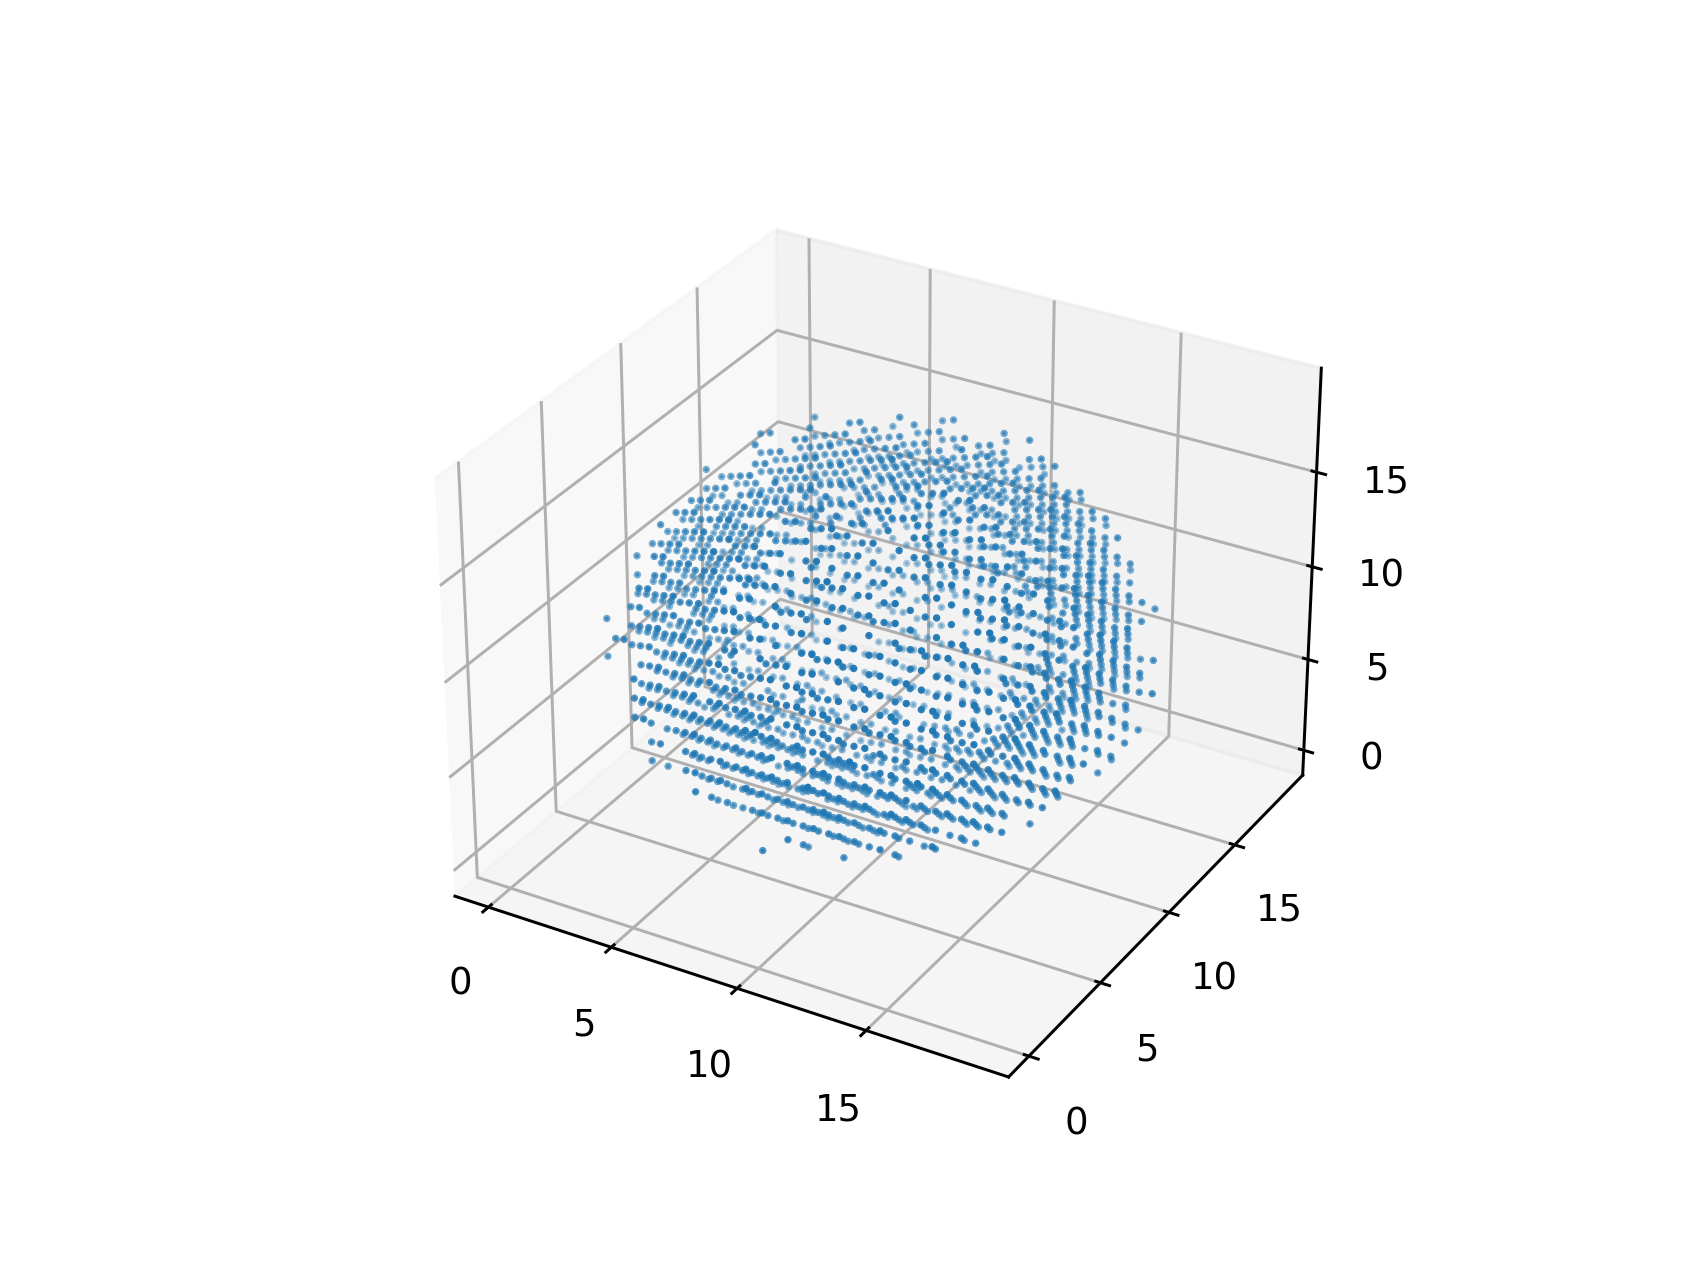

In [257]:
plot_pts(pts)

<IPython.core.display.Javascript object>


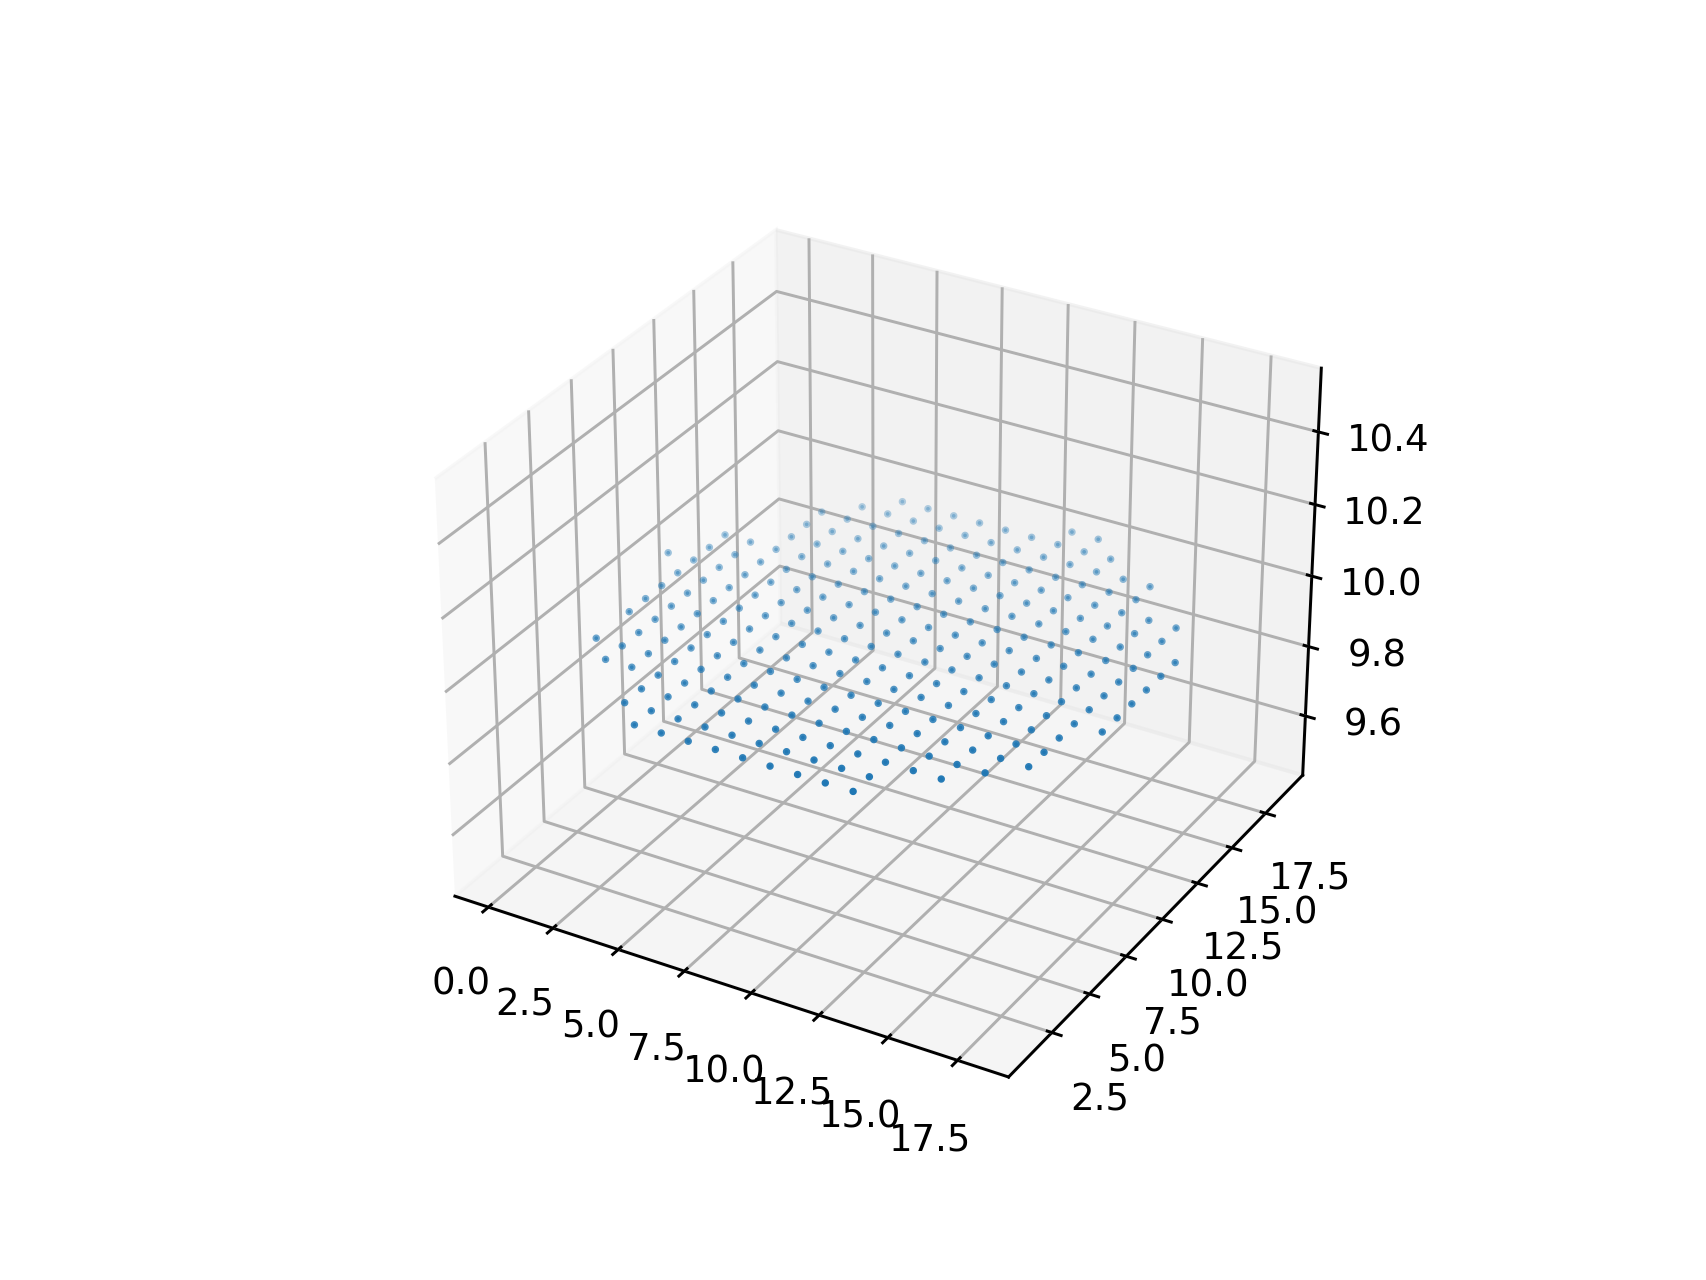

In [253]:
z=10
xsec=lambda pts,z:[pt for pt in pts if pt[2]==z]
plot_pts(xsec(full_cc,z))
#plot_pts(full_cc)

17a

In [99]:
ROCK_DATA='''####

.#.
###
.#.

..#
..#
###

#
#
#
#

##
##'''
def to_rock(s):
    rows=s.split('\n')
    return {(c,len(rows)-1-r)
            for r,row in enumerate(rows)
            for c,ch in enumerate(row) if ch=='#'}
shifted=lambda S,r1,c1:{(r+r1,c+c1) for r,c in S}
ROCKS=list(map(to_rock,ROCK_DATA.split('\n\n')))
ROCKS

[{(0, 0), (1, 0), (2, 0), (3, 0)},
 {(0, 1), (1, 0), (1, 1), (1, 2), (2, 1)},
 {(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)},
 {(0, 0), (0, 1), (0, 2), (0, 3)},
 {(0, 0), (0, 1), (1, 0), (1, 1)}]

In [129]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
for _ in range(2022):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
print(floor)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(('-' if y==0 else '#') if (x,y) in board else '.',end='')
#     print('')

3130


17b

In [165]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
floors=[floor]
for _ in range(100_000):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    floors.append(floor)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
print(floor)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(('-' if y==0 else '#') if (x,y) in board else '.',end='')
#     print('')

155657


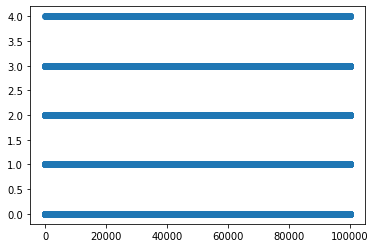

In [171]:
import matplotlib.pyplot as plt
plt.figure()
A=np.array(floors)
plt.scatter(range(len(A)-1),A[1:]-A[:-1])
plt.show()

In [174]:
for v in A[1:]-A[:-1]:
    print(v,end='')
print('')

1224000100030301321212320130220022013300130400020013320023021224213300122201302203340130021324013320123221334013302130021330013040123401332013211121201303213220130300332013220132201220013201033221212212302022111330213320122401324013300132221334013300133201322010310123000303212200132001332010342132121031103030133201220013320121221330012340022021334000130023221330012340133201334000100133001304003300133401330013220130401234000002123201303012300132021322013040132201212213002133200030202342112401230013320133021004000340133401212213300133221222002342133201332213042132201303002202021320300203012132221332213322132121232202220023221302013220132401322013020133421330013302123401222213320133000124013322123001321213211130400222013300133021330213340121421230213302030000320112302123021320013212132020303012300133000232013020133001303011212132001330013240133401332213040003401224010312132021332213340132421330012212023421224012320133201212013030133001212213220103101330202320123401213013002032401332013300

2013240132201302013342133001330212340122221332013300012401332212300132121321113040022201330013302133021334012142123021330203000032011230212302132001321213202030301230013300023201302013300130301121213200133001324013340133221304000340122401031213202133221334013242133001221202342122401232013320121201303013300121221322010310133020232012340121301300203240133201330013222003201330013201103120220012322122201230203200133221324000202030300230202300122111332013320133001330213212133201330013201121201330002320133001334013240023001220013202133421230213302132000303013212121201322012300112111121213220133401212002320022001330002120132201213013342132201234213200132201234200320133000130213300122200230103302112401332212202030110302012220122201303213340003001213001210123021031002300133221122013222133021232213302121200301013011122221322213222122201334000302003400200213300121221322012132123010322013300133220320013320023201330213030132201332013202133401332213220021201332212222133001300013201030400232013200133

In [175]:
D=A[1:]-A[:-1]
start='1224000100030301321212320130220022013300130400020013320023021224213300122201302203340130021324013320123221334013302130021330013040123401332013211121201303213220130300332013220132201220013201033221212212302022111330213320122401324013300132221334013300133201322010310123000303212200132001332010342132121031103030133201220013320121221330012340022021334000130023221330012340133201334000100133001304003300133401330013220130401234000002123201303012300132021322013040132201212213002133200030202342112401230013320133021004000340133401212213300133221222002342133201332213042132201303002202021320300203012132221332213322132121232202220023221302013220132401322013020133421330013302123401222213320133000124013322123001321213211130400222013300133021330213340121421230213302030000320112302123021320013212132020303012300133000232013020133001303011212132001330013240133401332213040003401224010312132021332213340132421330012212023421224012320133201212013030133001212213220103101330202320123401213013002032401332013300132220032013300132011031202200123221222012302032001332213240002020303002302023001221113320133201330013302132121332013300132011212013300023201330013340132400230012200132021334212302133021320003030132121212013220123001121111212132201334012120023200220013300021201322012130133421322012342132001322012342003201330001302133001222002301033021124013322122020301103020122201222013032133400030012130012101230210310023'
period='001332211220132221330212322133021212003010130111222213222132221222013340003020034002002133001212213220121321230103220133001332203200133200232013302130301322013320132021334013322132200212013322122221330013000132010304002320132001330012222132000222013042123401303013340130321303012342130300304012240133401332213020030301330012320030001320013302133021330013320123001322013220130201220012300133021324000300123200232013222103100332013320133200034203030130221220013300023001304002200032220221003240132101304013300133221212012301133400200013032130221232003012130011224003001133401212013220133401332013300123001210103320133001303213342133021322013222132201213212301133400222013340133201130202300133201232013200133221304003300133401330013220130401234000002123201303012300132021322013040132201212213002133200030202342112401230013320133021004000340133401212213300133221222002342133201332213042132201303002202021320300203012132221332213322132121232202220023221302013220132401322013020133421330013302123401222213320133000124013322123001321213211130400222013300133021330213340121421230213302030000320112302123021320013212132020303012300133000232013020133001303011212132001330013240133401332213040003401224010312132021332213340132421330012212023421224012320133201212013030133001212213220103101330202320123401213013002032401332013300132220032013300132011031202200123221222012302032001332213240002020303002302023001221113320133201330013302132121332013300132011212013300023201330013340132400230012200132021334212302133021320003030132121212013220123001121111212132201334012120023200220013300021201322012130133421322012342132001322012342003201330001302133001222002301033021124013322122020301103020122201222013032133400030012130012101230210310023'
B=list(map(int,start))
while len(B)<len(D):
    B.extend(map(int,period))
assert np.array_equal(B[:len(D)],D)
#partial differences are periodic!

In [176]:
T=10**12
Lstart=list(map(int,start))
Lperiod=list(map(int,period))
P=len(Lperiod)
tot=sum(Lstart)
nrem=T-len(Lstart)
tot+=sum(Lperiod)*(nrem//P)
tot+=sum(Lperiod[:(nrem%P)])
tot

1556521739139

other failed attempts on 17b

In [160]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
st=time.time()
stage={p:'-' for p in board}
gap=0
for _ in range(10**6):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    sh_rck=shifted(rck,px,py)
    board.update(sh_rck)
    for p in sh_rck:
        stage[p]=_//len(ROCKS)
    gap=max(gap,floor-py)
    floor=max(floor,py+wy)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
    if _%100_000==0 or _==2021:
        print(time.time()-st,_,floor,gap)
print(floor,gap)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(stage.get((x,y),'.'),end='')
#     print('')

0.18091917037963867 0 1 0
0.22905611991882324 2021 3130 34
2.589473009109497 100000 155658 34
4.972333192825317 200000 311308 34
7.347931861877441 300000 466959 34
9.733446836471558 400000 622609 34
12.078068017959595 500000 778266 34


KeyboardInterrupt: 

In [164]:
with open('in.txt') as f:
    jet=f.read()
W=7
dpH=35
board={(x,y) for x in range(W) for y in range(0,-dpH,-1)}
floor=0
t,r=0,0
st=time.time()
stage={p:'-' for p in board}
states={(frozenset(board),t,r)}
for _ in range(10**6):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    sh_rck=shifted(rck,px,py)
    board.update(sh_rck)
    for p in sh_rck:
        stage[p]=_//len(ROCKS)
    gap=max(gap,floor-py)
    floor=max(floor,py+wy)
    states.add((frozenset({(x,y) for x,y in board if y>floor-dpH}),t,r))
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
    if _%2_000==0 or _==2021:
        print(time.time()-st,_,floor,len(states))
print(floor,gap)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(stage.get((x,y),'.'),end='')
#     print('')

0.0005681514739990234 0 1 34 2
1.0519750118255615 2000 3101 34 2002
1.072876214981079 2021 3130 34 2023
4.285904884338379 4000 6226 34 4002
11.25725507736206 6000 9354 34 6002
22.978342056274414 8000 12473 34 8002
40.137227058410645 10000 15576 34 10002


KeyboardInterrupt: 

In [157]:
#incorrect
with open('in.txt') as f:
    jet=f.read()
W=7
ground=[0]*W
t,r=0,0
for _ in range(2022):
    rck=ROCKS[r]
    okay=lambda px,py : all(x>=0 and x<W and y>ground[x] for x,y in shifted(rck,px,py))
    px,py=2,max(ground)+4
    while True:
        sh=jet[t]
        if sh=='>':
            if okay(px+1,py):
                px+=1
        else:
            if okay(px-1,py):
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if not(okay(px,py-1)):
            break
        py-=1
    #print(px,py)
    for x,y in shifted(rck,px,py):
        ground[x]=max(ground[x],y)
    r=(r+1)%len(ROCKS)
    if _%100_000==0:
        print(time.time()-st,_,max(ground),ground)
print(time.time()-st,_,max(ground),ground)

704.3453140258789 0 1 [0, 1, 1, 1, 1, 0, 0]
704.4167308807373 2021 3155 [3119, 3152, 3154, 3155, 3154, 3145, 3145]


In [138]:
'''
FAILED DP IDEA:
assume that after every cycle of placing all 5 types of rocks,
that we only need to consider the section of the board
    consisting of the last 5 rocks we just placed
'''
def next_state(t_st,nrocks=len(ROCKS)): #current jet index is t
    W=7
    board={(x,0) for x in range(W)}
    floor=0
    t,r=t_st,0
    if nrocks>len(ROCKS):
        raise
    for rck in ROCKS[:nrocks]:
        wx,wy=max(x for x,y in rck),max(y for x,y in rck)
        px,py=2,floor+4
        #print('\t',px,py,wx,wy,W-1-wx)
        while True:
            sh=jet[t]
            if sh=='>':
                if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                    px+=1
            else:
                if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                    px-=1
            t=(t+1)%len(jet)
            #print('\t',sh,px,py)
            if len(shifted(rck,px,py-1)&board)>0:
                break
            py-=1
        board.update(shifted(rck,px,py))
        floor=max(floor,py+wy)
    return t,floor
t,floor=0,0
cnt=2022
for _ in range(cnt//len(ROCKS)):
    ret=next_state(t)
    t,floor=ret[0],floor+ret[1]
ret=next_state(t,cnt%len(ROCKS))
t,floor=ret[0],floor+ret[1]
t,floor

(660, 3344)

In [ ]:
with open('in.txt') as f:
    jet=f.read()
W=7
board={(x,0) for x in range(W)}
floor=0
t,r=0,0
#amount that floor will increase by
#    is completely determined by set of rocks at the floor row
#    and the three rows below it,
#    as well as the t and r counters
def next_state(window,t,r):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    return ..,t,(r+1)%len(ROCKS)
for _ in range(2022):
    rck=ROCKS[r]
    wx,wy=max(x for x,y in rck),max(y for x,y in rck)
    px,py=2,floor+4
    #print('\t',px,py,wx,wy,W-1-wx)
    while True:
        sh=jet[t]
        if sh=='>':
            if px+1<=W-1-wx and len(shifted(rck,px+1,py)&board)==0:
                px+=1
        else:
            if px-1>=0 and len(shifted(rck,px-1,py)&board)==0:
                px-=1
        t=(t+1)%len(jet)
        #print('\t',sh,px,py)
        if len(shifted(rck,px,py-1)&board)>0:
            break
        py-=1
    board.update(shifted(rck,px,py))
    floor=max(floor,py+wy)
    #print(px,py,floor)
    r=(r+1)%len(ROCKS)
print(floor)#,board
# for y in range(floor,-1,-1):
#     for x in range(W):
#         print(('-' if y==0 else '#') if (x,y) in board else '.',end='')
#     print('')

16a

In [20]:
def parse():
    with open('in.txt') as f:
        vals,G={},{}
        for l in f.read().split('\n'):
            p0,p1=l.split('; ')
            p0=p0.split(' ')
            v=p0[1]
            vals[v]=int(p0[-1].split('=')[-1])
            p1=(p1.split('valve ') if p1.find('valve ')>=0
                else p1.split('valves '))[-1]
            G[v]=p1.split(', ')
    return vals,G

In [43]:
vals,G=parse()
'''opened=set()
n_useful=sum(1 for v,p in vals.items() if p>0)
stats=[0]
st,mark,work=time.time(),0,0
def dfs(step,v,pressure,scr):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,step,v,pressure,scr,stats)
        mark+=5
    work+=1
    if step==30:
        stats[0]=max(stats[0],scr)
        return
    if len(opened)==n_useful:
        dfs(step+1,v,pressure,scr+pressure)
        return
    if v not in opened and vals[v]>0:
        opened.add(v)
        npress=pressure+vals[v]
        dfs(step+1,v,npress,scr+npress)
        opened.remove(v)
    for n in G[v]:
        dfs(step+1,n,pressure,scr+pressure)
dfs(0,'AA',0,0)
stats'''
#dp(time_left,location,set of valves open)
dp={}
def solve(dur,loc,opens):
    if dur<=0:
        return 0
    state=(dur,loc,opens)
    if state in dp:
        return dp[state]
    scr=0
    if loc not in opens and vals[loc]>0:
        scr=max(scr,solve(dur-1,loc,opens|{loc}))
    for n in G[loc]:
        scr=max(scr,solve(dur-1,n,opens))
    press=sum(vals[v] for v in opens)
    dp[state]=press+scr
    return dp[state]
solve(30,'AA',frozenset())

2330

alternative solution (an attempt was made to extend it in part 2)

In [51]:
vals,G=parse()
D={}
for s in vals:
    dists={s:0}
    front=[s]
    i=0
    while i<len(front):
        v=front[i]
        for n in G[v]:
            if n not in dists:
                dists[n]=dists[v]+1
                front.append(n)
        i+=1
    D[s]=dists
#print(D)
dp={}
usefuls={v for v,p in vals.items() if p>0}
print(usefuls)
def solve(dur,loc,opens):
    if dur<=0:
        return 0
    state=(dur,loc,opens)
    if state in dp:
        return dp[state]
    press=sum(vals[v] for v in opens)
    scr=press*dur
    for v in usefuls-opens:
        d=D[loc][v]
        if d+1<=dur:
            scr=max(scr,
                    press*(d+1)
                    +solve(dur-(d+1),v,opens|{v}))
    dp[state]=scr
    return dp[state]
solve(30,'AA',frozenset())

{'XN', 'RP', 'JA', 'VK', 'QK', 'JT', 'DH', 'EQ', 'ID', 'AD', 'DC', 'PF', 'DW', 'TA', 'EX'}


2330

16b

Python attempts (too slow):

In [60]:
'''vals,G=parse()
D={}
for s in vals:
    dists={s:0}
    front=[s]
    i=0
    while i<len(front):
        v=front[i]
        for n in G[v]:
            if n not in dists:
                dists[n]=dists[v]+1
                front.append(n)
        i+=1
    D[s]=dists
print(sum(1 for v,p in vals.items() if p>0))
dp={}
st,mark,work=time.time(),0,0
def solve(dur,la,lb,opens):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,dur,la,lb,opens,len(dp))
        mark+=5
    work+=1
    if dur<=0:
        return 0
    state=(dur,la,lb,opens)
    if state in dp:
        return dp[state]
    scr=0
    for va in G[la]+[la]:
        if va!=la or (la not in opens and vals[la]>0):
            for vb in G[lb]+[lb]:
                if vb!=lb or (lb not in opens and vals[lb]>0):
                    nopens=frozenset(opens)
                    if va==la:
                        nopens|={la}
                    if vb==lb:
                        nopens|={lb}
                    scr=max(scr,solve(dur-1,va,vb,nopens))
    press=sum(vals[v] for v in opens)
    dp[state]=press+scr
    return dp[state]
print(solve(26,'AA','AA',frozenset()))
print(time.time()-st,work,dur,la,lb,opens,len(dp))'''

15
0.0003457069396972656 0 26 AA AA frozenset() 0
5.0 3879522 0 OD BA frozenset({'QK', 'PF', 'JT'}) 561090
10.0 7726230 0 UN RP frozenset({'VK', 'RP', 'JT', 'TA', 'AD'}) 1115959
15.0 11294499 3 KW JT frozenset({'XN', 'PF', 'JT'}) 1652686
20.000001907348633 14941378 2 LK VK frozenset({'DH', 'QK', 'JT'}) 2208654
25.0 18573623 2 KW JN frozenset({'DH', 'VK', 'JA', 'PF'}) 2755459
30.0 22020534 0 MZ CR frozenset({'XN', 'RP', 'DC', 'PF'}) 3277605
35.0 25537583 2 WG ZX frozenset({'VK', 'QK'}) 3803673
40.0 29333286 3 QK PP frozenset({'DH', 'DC', 'TA', 'XN'}) 4388263
45.0 32555220 0 RI JL frozenset({'RP', 'QK', 'PF', 'JT'}) 4878552
50.00000190734863 36335196 4 MZ CR frozenset({'RP', 'QK', 'PF'}) 5462147
55.000000953674316 39160861 1 UN UN frozenset({'JA', 'RP', 'AD'}) 5896605
60.000000953674316 42962146 1 ZX PP frozenset({'XN', 'DC', 'QK', 'JT', 'DH', 'TA', 'AD'}) 6486864
65.00023174285889 46756060 0 OD JT frozenset({'VK', 'XN', 'JT', 'DH', 'EX'}) 7061692
70.00000095367432 49683372 2 MZ UN froze

KeyboardInterrupt: 

In [79]:
_vals,_G=parse()
nodes=list(_vals.keys())
node2idx={nodes[i]:i for i in range(len(nodes))}
V=[_vals[n] for n in nodes]
G=[[node2idx[u] for u in _G[n]]+[node2idx[n]] for n in nodes]
print(V,G)
print(sum(1 for v,p in vals.items() if p>0))

lacks_bit=lambda S,b:((S>>b)&1)==0

dp={}
st,mark,work=time.time(),0,0
def solve(dur,la,lb,opens,press):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,dur,la,lb,opens,press,len(dp))
        mark+=5
    work+=1
    if dur<=0:
        return 0
    state=(dur,la,lb,opens)
    if state in dp:
        return dp[state]
    scr=0
    for va in G[la]:
        for vb in G[lb]:
            nopens,npress=opens,press
            if va==la and (lacks_bit(nopens,la) and V[la]>0):
                nopens|=1<<la
                npress+=V[la]
            #!!!! handle edge case where va==vb
            if vb==lb and (lacks_bit(nopens,lb) and V[lb]>0):
                nopens|=1<<lb
                npress+=V[lb]
            scr=max(scr,solve(dur-1,va,vb,nopens,npress))
    dp[state]=press+scr
    return dp[state]
v0=node2idx['AA']
print(solve(26,v0,v0,0,0))
print(time.time()-st,work,len(dp))

[0, 24, 11, 0, 0, 25, 0, 0, 0, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 18, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 3, 0, 14, 0, 21, 0, 0, 0, 22, 0, 0, 0, 10, 0, 0, 0, 0, 13, 0, 0, 0, 23, 0, 0] [[36, 35, 0], [31, 12, 1], [17, 18, 53, 8, 2], [46, 41, 3], [35, 55, 4], [48, 5], [10, 30, 6], [51, 9, 7], [27, 2, 8], [11, 7, 56, 13, 9], [14, 43, 52, 11, 6, 10], [9, 10, 11], [1, 37, 12], [16, 9, 13], [10, 16, 14], [33, 45, 15], [47, 24, 23, 14, 13, 16], [28, 2, 17], [2, 34, 18], [38, 46, 27, 19], [54, 40, 20], [32, 21], [37, 48, 22], [16, 37, 23], [49, 16, 24], [26, 44, 25], [31, 25, 26], [19, 8, 27], [17, 45, 28], [41, 53, 29], [33, 6, 30], [26, 1, 31], [43, 21, 32], [42, 15, 51, 30, 39, 33], [35, 18, 34], [4, 0, 34, 35], [0, 41, 36], [23, 56, 12, 42, 22, 37], [45, 19, 38], [47, 33, 39], [20, 50, 40], [29, 44, 3, 36, 41], [33, 37, 42], [32, 10, 43], [25, 41, 44], [49, 15, 52, 28, 38, 45], [19, 3, 46], [39, 16, 47], [22, 5, 48], [45, 24, 49], [55, 40, 50], [7, 33, 51], [10, 45, 52], [29, 2, 53], [20, 5

KeyboardInterrupt: 

In [90]:
vals,G=parse()
opt_paths={}
for s in vals:
    paths={s:(s,)}
    front=[s]
    i=0
    while i<len(front):
        v=front[i]
        for n in G[v]:
            if n not in paths:
                paths[n]=paths[v]+(n,)
                front.append(n)
        i+=1
    opt_paths[s]=paths
#print(opt_paths)
dp={}
usefuls={v for v,p in vals.items() if p>0}
print(usefuls)
st,mark,work=time.time(),0,0
def solve(dur,la,lb,opens):
    global st
    global mark
    global work
    tm=time.time()-st
    if tm>=mark:
        print(tm,work,dur,la,lb,opens,len(dp))
        mark+=5
    work+=1
    if dur<=0:
        return 0
    state=(dur,la,lb,opens)
    if state in dp:
        return dp[state]
    press=sum(vals[v] for v in opens)
    scr=press*dur
    rems=usefuls-opens
    for va in rems: #A moves, B stays
        ta=len(opt_paths[la][va])
        if ta<=dur:
            scr=max(scr,press*ta+solve(dur-ta,va,lb,opens|{va}))
    for vb in rems: #B moves, A stays
        tb=len(opt_paths[lb][vb])
        if tb<=dur:
            scr=max(scr,press*tb+solve(dur-tb,la,vb,opens|{vb}))
    for va in rems:
        for vb in rems:
            ta=len(opt_paths[la][va])
            tb=len(opt_paths[lb][vb])
            if ta<=dur and tb<=dur:
                if ta==tb:
                    scr=max(scr,press*ta
                            +solve(dur-ta,va,vb,opens|{va}|{vb}))
                elif ta<tb:
                    scr=max(scr,press*ta
                            +solve(dur-ta,va,opt_paths[lb][vb][ta],opens|{va}))
                else: #tb<ta
                    scr=max(scr,press*tb
                           +solve(dur-tb,opt_paths[la][va][tb],vb,opens|{vb}))
    dp[state]=scr
    return dp[state]
print(solve(26,'AA','AA',frozenset()))
print(time.time()-st,work,len(dp))

{'XN', 'RP', 'JA', 'VK', 'QK', 'JT', 'DH', 'EQ', 'ID', 'AD', 'DC', 'PF', 'DW', 'TA', 'EX'}
0.0005650520324707031 0 26 AA AA frozenset() 0
5.0000128746032715 706234 2 RP PQ frozenset({'XN', 'JA', 'RP', 'DH', 'AD'}) 204113
10.000010967254639 1516314 4 JA MZ frozenset({'XN', 'VK', 'JA', 'QK', 'JT'}) 397570
15.00000810623169 2239679 3 RP RF frozenset({'XN', 'RP', 'QK', 'PF', 'JT', 'DH', 'EX'}) 577070
20.000003814697266 3071059 2 DH ZN frozenset({'XN', 'JA', 'RP', 'QK', 'PF', 'DH', 'TA'}) 753398
25.0000159740448 4006071 0 PF EX frozenset({'XN', 'DC', 'QK', 'PF', 'EX', 'AD'}) 915137
30.000001192092896 4973501 2 XL RP frozenset({'XN', 'RP', 'PF', 'JT', 'TA', 'ID'}) 1100629
35.0 5840456 0 PF QK frozenset({'XN', 'RP', 'VK', 'JA', 'QK', 'JT', 'DH', 'ID', 'AD', 'PF'}) 1264190
40.00000596046448 6866902 3 JL TA frozenset({'XN', 'QK', 'PF', 'JT', 'DW', 'TA'}) 1441468
45.000011920928955 7770091 6 AD PF frozenset({'XN', 'AD', 'PF', 'JT'}) 1596332
50.000003814697266 8876653 5 KW JT frozenset({'XN', 'VK

445.00000500679016 95866546 1 JA XL frozenset({'VK', 'JA', 'PF', 'DH', 'TA', 'AD'}) 12184988
450.00001192092896 96678217 5 DC JT frozenset({'VK', 'DC', 'PF', 'JT', 'DH', 'TA'}) 12309818
455.0 97616805 6 BA QK frozenset({'VK', 'PF', 'QK', 'TA', 'AD'}) 12409993
460.00000190734863 98601715 1 ID JT frozenset({'XN', 'JA', 'QK', 'JT', 'DH', 'ID', 'EX'}) 12548741
465.00000190734863 99788889 4 PF YH frozenset({'XN', 'JA', 'QK', 'PF', 'DH', 'TA', 'AD'}) 12699792
470.0000867843628 100676720 1 VK AD frozenset({'RP', 'QK', 'JT', 'DH', 'AD'}) 12836324
475.0000100135803 101708616 4 PF JA frozenset({'VK', 'JA', 'QK', 'PF', 'DH', 'TA'}) 12984489
480.00000190734863 102747049 6 PF RP frozenset({'VK', 'RP', 'QK', 'JT', 'AD'}) 13117098
485.00000286102295 103873120 0 ID XN frozenset({'VK', 'XN', 'QK', 'JT', 'DH', 'ID', 'AD', 'TA', 'EX'}) 13260153
490.0000011920929 105003221 0 JT JA frozenset({'VK', 'RP', 'XN', 'JA', 'QK', 'JT', 'DH', 'PF', 'TA'}) 13393464
495.0 106161694 2 DW ID frozenset({'VK', 'QK', 'DW'

870.0000081062317 165970553 3 DC FE frozenset({'XN', 'DC', 'PF', 'QK', 'JT', 'DH', 'AD'}) 19252529
875.0000019073486 167164365 1 JA JA frozenset({'DC', 'RP', 'XN', 'JA', 'PF', 'JT', 'DH', 'TA'}) 19348294
880.0000488758087 168303521 2 HL PF frozenset({'XN', 'VK', 'PF', 'EQ', 'DH', 'ID', 'EX'}) 19430837
885.0 169301629 3 EQ PF frozenset({'VK', 'JT', 'DH', 'EQ', 'ID', 'AD', 'DW', 'PF', 'TA'}) 19504876
890.0000019073486 170476088 4 DW KU frozenset({'VK', 'JA', 'PF', 'QK', 'DW', 'DH'}) 19601625
895.0000069141388 171674874 2 RP KJ frozenset({'XN', 'VK', 'RP', 'PF', 'DH', 'EX'}) 19694022
900.0000019073486 172683560 7 OD ID frozenset({'RP', 'QK', 'JT', 'DH', 'ID', 'AD'}) 19772149
905.0022249221802 173938480 4 JA TA frozenset({'VK', 'XN', 'JA', 'JT', 'DH', 'TA', 'EX', 'AD'}) 19862946
910.0005230903625 174913477 2 QK JA frozenset({'XN', 'VK', 'JA', 'QK', 'DH', 'TA', 'ID', 'EX'}) 19950543
915.0000150203705 176024383 2 DW RI frozenset({'DC', 'JA', 'VK', 'QK', 'DW', 'DH', 'ID', 'AD'}) 20042633
920.

1295.0000019073486 214065046 7 ZK RP frozenset({'DC', 'JA', 'RP', 'PF', 'JT'}) 23197842
1300.003664970398 214715826 7 ZX AD frozenset({'XN', 'PF', 'DH', 'EX', 'AD'}) 23239661
1305.0004208087921 215200189 2 VE DH frozenset({'XN', 'VK', 'JT', 'DH', 'AD', 'DC', 'PF', 'TA', 'EX'}) 23282791
1310.0000109672546 215592178 2 AD JT frozenset({'XN', 'RP', 'PF', 'JT', 'TA'}) 23315590
1315.0001230239868 216107290 4 QK AD frozenset({'VK', 'XN', 'DH', 'TA', 'AD'}) 23352394
1320.0000159740448 216502018 1 JT PF frozenset({'RP', 'QK', 'PF', 'JT', 'DH', 'TA', 'AD'}) 23376605
1325.0000050067902 217198563 2 DW EX frozenset({'QK', 'DW', 'TA', 'EX', 'AD'}) 23430483
1330.000001192093 217746300 5 QK TA frozenset({'QK', 'TA', 'JA', 'AD'}) 23464113
1335.0001921653748 218258096 4 JT DH frozenset({'DH', 'TA', 'JA', 'AD'}) 23498865
1340.000002861023 218783913 1 JT DW frozenset({'VK', 'RP', 'QK', 'JT', 'DH', 'AD', 'PF', 'DW', 'TA'}) 23529206
1345.0000221729279 219382824 2 DH BA frozenset({'VK', 'QK', 'PF', 'DH', 'TA

1725.0002310276031 262146021 3 TA ID frozenset({'RP', 'QK', 'JT', 'DH', 'TA', 'ID', 'AD'}) 26588685
1730.0002670288086 262547022 0 YP JA frozenset({'VK', 'JA', 'QK', 'DW', 'JT', 'TA'}) 26607117
1735.000009059906 262954371 4 EX OD frozenset({'DC', 'RP', 'JT', 'TA', 'EX'}) 26634145
1740.0007050037384 263394281 9 RP BA frozenset({'RP', 'PF', 'JT', 'DH', 'ID'}) 26659851
1745.0000019073486 263849833 2 PF AD frozenset({'PF', 'JT', 'TA', 'EX', 'AD'}) 26683755
1750.0000100135803 264304807 8 JA JT frozenset({'RP', 'JA', 'QK', 'JT', 'DH', 'AD'}) 26713511
1755.0 264650694 5 JT JT frozenset({'DC', 'XN', 'JT', 'DH', 'TA', 'AD'}) 26733143
1760.0000100135803 264986084 1 TA ID frozenset({'JA', 'DW', 'PF', 'QK', 'DH', 'TA', 'AD'}) 26752386
1765.0000698566437 265347249 4 ZN TA frozenset({'DC', 'DW', 'DH', 'TA', 'EX'}) 26774226
1770.0000200271606 265772987 1 PF JA frozenset({'XN', 'VK', 'JA', 'DW', 'PF', 'DH'}) 26809535
1775.0000019073486 266416140 4 QL EQ frozenset({'XN', 'RP', 'EQ', 'JT', 'DH', 'EX', '

KeyboardInterrupt: 

Java solution:

In [ ]:
import java.io.*;
import java.util.*;
public class D16 {
    public static boolean lacks_bit(int S, int b) {
        if (b<0 || b>=32) throw new RuntimeException();
        return ((S>>>b)&1)==0;
    }
    public static void main(String[] args) throws IOException {
        BufferedReader in=new BufferedReader(new FileReader("D16.in"));
        Map<String,Integer> vals=new HashMap<>();
        Map<String,String[]> neighbors=new HashMap<>();
        while (true) {
            String l=in.readLine();
            if (l==null) break;
            String[] parts=l.split("; ");
            String p0=parts[0], p1=parts[1];
            String[] p0s=p0.split(" ");
            String v=p0s[1];
            vals.put(v,Integer.parseInt(p0s[p0s.length-1].split("=")[1]));
            p1=(p1.indexOf("valves ")>=0?
                    p1.split("valves "):
                    p1.split("valve "))[1];
            neighbors.put(v,p1.split(", "));
        }
        //System.out.println(vals);
        //for (String v:neighbors.keySet()) System.out.println(v+" "+Arrays.toString(neighbors.get(v)));
        List<String> nodes=new ArrayList<>(vals.keySet());
        Map<String,Integer> node2idx=new HashMap<>();
        int N=nodes.size();
        for (int i=0; i<N; i++) node2idx.put(nodes.get(i),i);
        int[] V=new int[N]; int[][] G=new int[N][];
        for (int i=0; i<N; i++) {
            String n=nodes.get(i);
            V[i]=vals.get(n);
            String[] ns=neighbors.get(n);
            G[i]=new int[ns.length+1];
            for (int j=0; j<ns.length; j++) G[i][j]=node2idx.get(ns[j]);
            G[i][ns.length]=i;
        }
        //System.out.println(Arrays.toString(V));
        //for (int i=0; i<N; i++) System.out.println(Arrays.toString(G[i]));
        int[] I2U=new int[N]; Arrays.fill(I2U,-1);
        int U=0;
        for (int i=0; i<N; i++) if (V[i]>0) {
            I2U[i]=U;
            U++;
        }
        class Help {
            public int encode(int S, int a, int b) {
                return (S*N+a)*N+b;
            }
        } Help $=new Help();
        int[] pressure=new int[1<<U];
        for (int S=0; S<(1<<U); S++) {
            int p=0;
            for (int i=0; i<N; i++)
                if (I2U[i]>=0 && !lacks_bit(S,I2U[i]))
                    p+=V[i];
            pressure[S]=p;
        }
        int[] dp=new int[(1<<U)*N*N];
        long st=System.currentTimeMillis();
        for (int rep=1; rep<=26; rep++) {
            int[] ndp=new int[dp.length];
            for (int S=0; S<(1<<U); S++)
            for (int a=0; a<N; a++)
            for (int b=0; b<N; b++) {
                int scr=0;
                for (int na:G[a]) for (int nb:G[b]) {
                    int nS=S;
                    if (na==a && I2U[a]>=0) nS|=1<<I2U[a];
                    if (nb==b && I2U[b]>=0) nS|=1<<I2U[b];
                    scr=Math.max(scr,dp[$.encode(nS,na,nb)]);
                }
                ndp[$.encode(S,a,b)]=pressure[S]+scr;
            }
            dp=ndp;
            System.out.println("rep="+rep+" time="+(System.currentTimeMillis()-st));
        }
        int v0=node2idx.get("AA");
        System.out.println(dp[$.encode(0,v0,v0)]);
    }
}

stdout:

In [ ]:
rep=1 time=8761
rep=2 time=18196
rep=3 time=28487
rep=4 time=38296
rep=5 time=46393
rep=6 time=54129
rep=7 time=61738
rep=8 time=69813
rep=9 time=78035
rep=10 time=86134
rep=11 time=94349
rep=12 time=102422
rep=13 time=110515
rep=14 time=118612
rep=15 time=126699
rep=16 time=134928
rep=17 time=143022
rep=18 time=151110
rep=19 time=159209
rep=20 time=167304
rep=21 time=175591
rep=22 time=183646
rep=23 time=191747
rep=24 time=199827
rep=25 time=207933
rep=26 time=216040
2675

Process finished with exit code 0


15a

In [27]:
with open('in.txt') as f:
    pairs=[]
    for l in f.read().split('\n'):
        p0,p1=l.split(': ')
        pt=lambda s:tuple(int(pc.split('=')[-1]) for pc in s.replace(',','').split(' ')[-2:])
        pairs.append((pt(p0),pt(p1)))
beacons={p1 for p0,p1 in pairs}
dist=lambda pa,pb:sum(abs(a-b) for a,b in zip(pa,pb))
yp=2000000
cnt=0
'''xlo=min(p0[0]-dist(p0,p1) for p0,p1 in pairs)
xhi=max(p0[0]+dist(p0,p1) for p0,p1 in pairs)
print(xlo,xhi)
for x in range(xlo,xhi+1):
    if (x,yp) not in beacons:
        #print(x)
        bad=False
        for p0,p1 in pairs:
            if dist(p0,(x,yp))<=dist(p0,p1):
                bad=True
                break
        if bad:
            cnt+=1
cnt'''
bads=set()
for p0,p1 in pairs:
    d=dist(p0,p1)
    yd=abs(p0[1]-yp)
    if yd<=d:
        max_xd=d-yd
        print(p0,d,yd)
        bads.update(range(p0[0]-max_xd,p0[0]+max_xd+1))
bads-={x for x in bads if (x,yp) in beacons}
len(bads)#,bads

(666423, 3063763) 1881774 1063763
(2707326, 2596893) 625999 596893
(3103704, 1560342) 991953 439658
(1708530, 855013) 1987866 1144987
(3280639, 2446475) 787992 446475
(2348869, 2240374) 442914 240374
(3973153, 2034945) 954488 34945
(38670, 785556) 1460881 1214444


5100463

15b

In [38]:
with open('in.txt') as f:
    pairs=[]
    for l in f.read().split('\n'):
        p0,p1=l.split(': ')
        pt=lambda s:tuple(int(pc.split('=')[-1]) for pc in s.replace(',','').split(' ')[-2:])
        pairs.append((pt(p0),pt(p1)))
beacons={p1 for p0,p1 in pairs}
dist=lambda pa,pb:sum(abs(a-b) for a,b in zip(pa,pb))
MAX=4000_000
xlo,xhi=0,MAX
found=False
st,mark,work=time.time(),0,0
for yp in range(MAX+1):
    intvs=[(x,x) for x,y in beacons if y==yp]
    for p0,p1 in pairs:
        d=dist(p0,p1)
        sx,sy=p0
        yd=abs(sy-yp)
        if yd<=d:
            max_xd=d-yd
            intvs.append((
                max(xlo,sx-max_xd),min(xhi,sx+max_xd)
            ))
    #check if union(intvs)==[xlo,xhi]
    intvs=sorted(intvs)
    cover=intvs[0][0]==xlo
    if cover:
        cover_hi=intvs[0][1]
        for intv in sorted(intvs):
            if cover_hi<intv[0]:
                cover=False
                break
            cover_hi=max(cover_hi,intv[1])
        if cover:
            cover=cover_hi==xhi
    if not(cover):
        for x in range(xlo,xhi+1):
            if all(x<l or x>r for l,r in intvs):
                print(x,yp,x*4000_000+yp)
                found=True
                break
    if found:
        break
    work+=1
    tm=time.time()-st
    if tm>=mark:
        print(tm,work)
        mark+=10

0.0002930164337158203 1
10.000033855438232 278502
20.000001192092896 561327
30.000025033950806 839178
40.00001811981201 1111538
50.000020027160645 1312501
60.000003814697266 1575972
70.00001907348633 1834771
80.00001215934753 2080622
90.0000069141388 2318733
100.00003218650818 2554725
110.00003385543823 2787935
120.00003910064697 3009753
2889465 3040754 11557863040754


14a

In [14]:
def btwns(a,b):
    return list(range(min(a,b),max(a,b)+1))
with open('in.txt') as f:
    rocks=set()
    for l in f.read().split('\n'):
        pts=[tuple(map(int,s.split(',')))
             for s in l.split(' -> ')]
        #print(pts)
        for a,b in zip(pts,pts[1:]):
            #print(a,b)
            if a[0]==b[0]:
                rocks.update((a[0],y) for y in btwns(a[1],b[1]))
            else:
                assert a[1]==b[1]
                rocks.update((x,a[1]) for x in btwns(a[0],b[0]))
bound_y=max(pt[1] for pt in rocks)+1
source=(500,0)
cnt=0
taken=set(rocks)
while True:
    sand=source
    rested=False
    while sand[1]<bound_y:
        locs=[(sand[0],sand[1]+1),
              (sand[0]-1,sand[1]+1),
              (sand[0]+1,sand[1]+1)]
        moved=False
        for loc in locs:
            if not(loc in taken):
                sand=loc
                moved=True
                break
        if not(moved):
            rested=True
            break
    if not(rested):
        break
    taken.add(sand)
    cnt+=1
cnt

799

14b

In [18]:
def btwns(a,b):
    return list(range(min(a,b),max(a,b)+1))
with open('in.txt') as f:
    rocks=set()
    for l in f.read().split('\n'):
        pts=[tuple(map(int,s.split(',')))
             for s in l.split(' -> ')]
        #print(pts)
        for a,b in zip(pts,pts[1:]):
            #print(a,b)
            if a[0]==b[0]:
                rocks.update((a[0],y) for y in btwns(a[1],b[1]))
            else:
                assert a[1]==b[1]
                rocks.update((x,a[1]) for x in btwns(a[0],b[0]))
floor=max(pt[1] for pt in rocks)+1
source=(500,0)
cnt=0
taken=set(rocks)
while True:
    sand=source
    rested=False
    while sand[1]<floor:
        locs=[(sand[0],sand[1]+1),
              (sand[0]-1,sand[1]+1),
              (sand[0]+1,sand[1]+1)]
        moved=False
        for loc in locs:
            if not(loc in taken):
                sand=loc
                moved=True
                break
        if not(moved):
            rested=True
            break
    taken.add(sand)
    cnt+=1
    if sand==source:
        break
cnt

29076

13a

In [11]:
with open('in.txt') as f:
    pairs=[list(map(eval,ch.split('\n')))
           for ch in f.read().split('\n\n')]
def comp(A,B):
    if isinstance(A,int) and isinstance(B,int):
        return (-1 if A<B else 0 if A==B else 1)
    if isinstance(A,int):
        A=[A]
    if isinstance(B,int):
        B=[B]
    for a,b in zip(A,B):
        d=comp(a,b)
        if d!=0:
            return d
    d=len(A)-len(B)
    return -1 if d<0 else 0 if d==0 else 1

ans=0
for _,(A,B) in enumerate(pairs):
    if comp(A,B)<0:
        ans+=_+1
ans

4821

13b

In [21]:
with open('in.txt') as f:
    pkts=[]
    for ch in f.read().split('\n\n'):
        pkts.extend(map(eval,ch.split('\n')))
DA,DB=[[2]],[[6]]
pkts.extend([DA,DB])
def comp(A,B):
    if isinstance(A,int) and isinstance(B,int):
        return (-1 if A<B else 0 if A==B else 1)
    if isinstance(A,int):
        A=[A]
    if isinstance(B,int):
        B=[B]
    for a,b in zip(A,B):
        d=comp(a,b)
        if d!=0:
            return d
    d=len(A)-len(B)
    return -1 if d<0 else 0 if d==0 else 1

import functools
pkts=sorted(pkts,key=functools.cmp_to_key(comp))
idxs=[i+1 for i,pkt in enumerate(pkts) if pkt==DA or pkt==DB]
idxs[0]*idxs[1]

21890

12a

In [8]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
def loc(ch,A):
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]==ch:
                return (i,j)
    return None
st,en=loc('S',A),loc('E',A)
A[st[0]][st[1]]='a'
A[en[0]][en[1]]='z'
A=[list(map(ord,row)) for row in A]
inside=lambda pt:0<=pt[0] and pt[0]<len(A) and 0<=pt[1] and pt[1]<len(A[0])

seen=set([st])
front=set([st])
dist={st:0}
DR,DC=[1,0,-1,0],[0,1,0,-1]
while len(front)>0:
    bf,bscr=None,float('inf')
    for f in front:
        if dist[f]<bscr:
            bscr=dist[f]
            bf=f
    if bf==en:
        break
    front.remove(bf)
    for d in range(4):
        n=(bf[0]+DR[d],bf[1]+DC[d])
        nd=dist[bf]+1
        if (inside(n)
            and not(n in seen)
            and (not(n in dist) or nd<dist[n])
            and A[n[0]][n[1]]<=A[bf[0]][bf[1]]+1):
            front.add(n)
            seen.add(n)
            dist[n]=nd
print(dist[en])

330


12b

In [16]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
def loc(ch,A):
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]==ch:
                return (i,j)
    return None
st,en=loc('S',A),loc('E',A)
A[st[0]][st[1]]='a'
A[en[0]][en[1]]='z'
A=[list(map(ord,row)) for row in A]
inside=lambda pt:0<=pt[0] and pt[0]<len(A) and 0<=pt[1] and pt[1]<len(A[0])

def cost(A,st,en):
    seen=set([st])
    front=set([st])
    dist={st:0}
    DR,DC=[1,0,-1,0],[0,1,0,-1]
    while len(front)>0:
        bf,bscr=None,float('inf')
        for f in front:
            if dist[f]<bscr:
                bscr=dist[f]
                bf=f
        if bf==en:
            return dist[en]
        front.remove(bf)
        for d in range(4):
            n=(bf[0]+DR[d],bf[1]+DC[d])
            nd=dist[bf]+1
            if (inside(n)
                and not(n in seen)
                and (not(n in dist) or nd<dist[n])
                and A[n[0]][n[1]]<=A[bf[0]][bf[1]]+1):
                front.add(n)
                seen.add(n)
                dist[n]=nd
    return float('inf')

min(cost(A,(i,j),en)
    for i in range(len(A)) for j in range(len(A[i]))
    if A[i][j]==ord('a'))

321

In [17]:
#more efficient code I meant to implement
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
def loc(ch,A):
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]==ch:
                return (i,j)
    return None
st,en=loc('S',A),loc('E',A)
A[st[0]][st[1]]='a'
A[en[0]][en[1]]='z'
A=[list(map(ord,row)) for row in A]
inside=lambda pt:0<=pt[0] and pt[0]<len(A) and 0<=pt[1] and pt[1]<len(A[0])

st=en
ens={(i,j)
     for i in range(len(A)) for j in range(len(A[i]))
     if A[i][j]==ord('a')}
seen=set([st])
front=set([st])
dist={st:0}
DR,DC=[1,0,-1,0],[0,1,0,-1]
while len(front)>0:
    bf,bscr=None,float('inf')
    for f in front:
        if dist[f]<bscr:
            bscr=dist[f]
            bf=f
    if bf in ens:
        print(dist[bf])
        break
    front.remove(bf)
    for d in range(4):
        n=(bf[0]+DR[d],bf[1]+DC[d])
        nd=dist[bf]+1
        if (inside(n)
            and not(n in seen)
            and (not(n in dist) or nd<dist[n])
            and A[n[0]][n[1]]>=A[bf[0]][bf[1]]-1):
            front.add(n)
            seen.add(n)
            dist[n]=nd

321


11a

In [23]:
with open('in.txt') as f:
    info=f.read().split('\n\n')
def func(op):
    if op=='old*old':
        return lambda x:x*x
    if op.find('+')>=0:
        v=int(op.split('+')[1])
        return lambda x:x+v
    assert op.find('*')>=0
    v=int(op.split('*')[1])
    return lambda x:x*v
monkeys=[]
for chunk in info:
    arr,op,test,_true,_false=[
        l.split(': ')[-1] for l in chunk.split('\n')
    ][1:]
    arr=list(map(int,arr.split(', ')))
    op=op[len('new = '):].replace(' ','')
    test=int(test[len('divisible by '):])
    _true,_false=map(lambda s:int(s[len('throw to monkey '):]),
                    [_true,_false])
    print(arr,op,test,_true,_false)
    op=func(op)
    print('\t',[op(i) for i in range(10)])
    monkeys.append((arr,op,test,_true,_false))
print('-'*10)

M=len(monkeys)
cnts=[0]*M
for _ in range(20):
    #print(f'round {_}')
    for m in range(M):
        arr,op,test,_true,_false=monkeys[m]
        while len(arr)>0:
            cnts[m]+=1
            v=arr[0]
            del arr[0]
            v=op(v)//3
            monkeys[
                _true if v%test==0 else _false
            ][0].append(v)
        monkeys[m]=(arr,op,test,_true,_false)
print(monkeys)
print(cnts)
a,b=sorted(cnts)[-2:]
a*b

[52, 78, 79, 63, 51, 94] old*13 5 1 6
	 [0, 13, 26, 39, 52, 65, 78, 91, 104, 117]
[77, 94, 70, 83, 53] old+3 7 5 3
	 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[98, 50, 76] old*old 13 0 6
	 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[92, 91, 61, 75, 99, 63, 84, 69] old+5 11 5 7
	 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[51, 53, 83, 52] old+7 3 2 0
	 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[76, 76] old+4 2 4 7
	 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[75, 59, 93, 69, 76, 96, 65] old*19 17 1 3
	 [0, 19, 38, 57, 76, 95, 114, 133, 152, 171]
[89] old+2 19 2 4
	 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
----------
[([28, 28, 5, 39196, 178, 16, 2628668], <function func.<locals>.<lambda> at 0x11c5d8af0>, 5, 1, 6), ([], <function func.<locals>.<lambda> at 0x11c5d8820>, 7, 5, 3), ([39843, 39843, 3, 3, 3, 3, 3, 3, 708, 708, 3, 3], <function func.<locals>.<lambda> at 0x11bb0a280>, 13, 0, 6), ([1267010319, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19], <function func.<locals>.<lambda> at 0x11bb0a1f0>, 11, 5, 7), ([525617776, 3, 1

58786

11b

In [39]:
with open('in.txt') as f:
    info=f.read().split('\n\n')
def func(op):
    if op=='old*old':
        return lambda x:x*x
    if op.find('+')>=0:
        v=int(op.split('+')[1])
        return lambda x:x+v
    assert op.find('*')>=0
    v=int(op.split('*')[1])
    return lambda x:x*v
monkeys=[]
for chunk in info:
    arr,op,test,_true,_false=[
        l.split(': ')[-1] for l in chunk.split('\n')
    ][1:]
    arr=list(map(int,arr.split(', ')))
    op=op[len('new = '):].replace(' ','')
    test=int(test[len('divisible by '):])
    _true,_false=map(lambda s:int(s[len('throw to monkey '):]),
                    [_true,_false])
    print(arr,op,test,_true,_false)
    op=func(op)
    print('\t',[op(i) for i in range(10)])
    monkeys.append((arr,op,test,_true,_false))
print('-'*10)

M=len(monkeys)
MOD=math.lcm(*[m[2] for m in monkeys])
print(f'{MOD=}')
cnts=[0]*M
for _ in range(10_000):
    #print(f'round {_}')
    for m in range(M):
        arr,op,test,_true,_false=monkeys[m]
        while len(arr)>0:
            cnts[m]+=1
            v=arr[0]
            del arr[0]
            v=op(v)%MOD
            monkeys[
                _true if v%test==0 else _false
            ][0].append(v)
        monkeys[m]=(arr,op,test,_true,_false)
print(monkeys)
print(cnts)
a,b=sorted(cnts)[-2:]
a*b

[52, 78, 79, 63, 51, 94] old*13 5 1 6
	 [0, 13, 26, 39, 52, 65, 78, 91, 104, 117]
[77, 94, 70, 83, 53] old+3 7 5 3
	 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[98, 50, 76] old*old 13 0 6
	 [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[92, 91, 61, 75, 99, 63, 84, 69] old+5 11 5 7
	 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[51, 53, 83, 52] old+7 3 2 0
	 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[76, 76] old+4 2 4 7
	 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[75, 59, 93, 69, 76, 96, 65] old*19 17 1 3
	 [0, 19, 38, 57, 76, 95, 114, 133, 152, 171]
[89] old+2 19 2 4
	 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
----------
MOD=9699690
[([4433588, 4224211, 8134772, 9520442], <function func.<locals>.<lambda> at 0x11c4949d0>, 5, 1, 6), ([4211597], <function func.<locals>.<lambda> at 0x11d0b00d0>, 7, 5, 3), ([9453198, 9453198, 9453198, 5124276, 5124276, 5513304, 663459], <function func.<locals>.<lambda> at 0x11d0b0550>, 13, 0, 6), ([5940103, 5940103, 5751889, 9453184, 9384518, 9384518, 3391804, 4159746, 3874461, 3874461, 273600], <functi

14952185856

10a

In [28]:
with open('in.txt') as f:
    X,clock=1,1
    hist={}
    for l in f.read().split('\n'):
        dur=1 if l=='noop' else 2
        for _ in range(dur):
            hist[clock]=X
            if _==dur-1:
                X+=int(l.split(' ')[1]) if l.startswith('addx') else 0
            clock+=1
ts=[20,60,100,140,180,220]
print(sum(t*hist[t] for t in ts))
#hist

11220


10b

In [29]:
C=40
ret=[]
for t,x in sorted(hist.items()):
    #print(t,x)
    ret.append('#' if abs((t-1)%C-x)<=1 else '.')
for i in range(0,len(ret),C):
    print(''.join(ret[i:i+C]))

###..####.###...##....##.####.#....#..#.
#..#....#.#..#.#..#....#.#....#....#.#..
###....#..#..#.#..#....#.###..#....##...
#..#..#...###..####....#.#....#....#.#..
#..#.#....#....#..#.#..#.#....#....#.#..
###..####.#....#..#..##..####.####.#..#.


9a

In [41]:
DVECS={
    'R':(1,0),
    'L':(-1,0),
    'U':(0,1),
    'D':(0,-1)
}
MOORE_DVECS=list(DVECS.values())+[
    (1,1),
    (1,-1),
    (-1,1),
    (-1,-1)
]
vsum=lambda a,b:tuple([ai+bi for ai,bi in zip(a,b)])
diffs=lambda a,b:set(abs(ai-bi) for ai,bi in zip(a,b))
mdist=lambda a,b:sum(abs(ai-bi) for ai,bi in zip(a,b))
chdist=lambda a,b:max(abs(ai-bi) for ai,bi in zip(a,b))
with open('in.txt') as f:
    instrs=[]
    for l in f.read().split('\n'):
        d,v=l.split(' ')
        instrs.append((d,int(v)))
all_tails=set()
head,tail=(0,0),(0,0)
all_tails.add(tail)
for d,rep in instrs:
    #print('***')
    for _ in range(rep):
        vec=DVECS[d]
        head=vsum(head,vec)
        if diffs(head,tail)=={2,0}:
            tail=vsum(tail,vec)
        elif chdist(head,tail)>1:
            best_moore=sorted(MOORE_DVECS,
                              key=lambda v:mdist(vsum(tail,v),head)
                             )
            #print([(v,mdist(v,head)) for v in best_moore])
            best_moore=best_moore[0]
            tail=vsum(tail,best_moore)
        all_tails.add(tail)
        #print(head,tail,vec)
len(all_tails)

5907

9b

In [40]:
DVECS={
    'R':(1,0),
    'L':(-1,0),
    'U':(0,1),
    'D':(0,-1)
}
vsum=lambda a,b:tuple([ai+bi for ai,bi in zip(a,b)])
diffs=lambda a,b:set(abs(ai-bi) for ai,bi in zip(a,b))
mdist=lambda a,b:sum(abs(ai-bi) for ai,bi in zip(a,b))
chdist=lambda a,b:max(abs(ai-bi) for ai,bi in zip(a,b))
def cap(v):
    return max(-1,min(1,v))
def ntail(head,tail):
    if chdist(head,tail)>1:
        return vsum(tail,
                    (cap(head[0]-tail[0]),
                     cap(head[1]-tail[1]))
                   )
    else:
        return tail
with open('in.txt') as f:
    instrs=[]
    for l in f.read().split('\n'):
        d,v=l.split(' ')
        instrs.append((d,int(v)))
all_tails=set()
rope=[(0,0) for _ in range(10)]
all_tails.add(rope[-1])
for d,rep in instrs:
    #print('***')
    for _ in range(rep):
        vec=DVECS[d]
        rope[0]=vsum(rope[0],vec)
        for i in range(1,len(rope)):
            rope[i]=ntail(rope[i-1],rope[i])
        all_tails.add(rope[-1])
    #print(d,rep,rope)
len(all_tails)

2303

8a

In [6]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
    A=[list(map(int,row)) for row in A]
#print(A)
R,C=len(A),len(A[0])
DR,DC=[1,0,-1,0],[0,1,0,-1]
out=0
for i in range(R):
    for j in range(C):
        vis=False
        for d in range(4):
            v=A[i][j]
            vals=[]
            ni,nj=i,j
            while 0<=ni and ni<R and 0<=nj and nj<C:
                if (ni,nj)!=(i,j):
                    vals.append(A[ni][nj])
                ni+=DR[d]
                nj+=DC[d]
            if len(vals)==0 or max(vals)<v:
                vis=True
                break
        if vis:
            out+=1
print(out)

1684


8b

In [17]:
with open('in.txt') as f:
    A=list(map(list,f.read().split('\n')))
    A=[list(map(int,row)) for row in A]
#print(A)
R,C=len(A),len(A[0])
DR,DC=[1,0,-1,0],[0,1,0,-1]
out=0
def prod(L):
    out=1
    for v in L:
        out*=v
    return out
for i in range(R):
    for j in range(C):
        dists=[]
        for d in range(4):
            v=A[i][j]
            ni,nj=i,j
            l=0
            while 0<=ni and ni<R and 0<=nj and nj<C:
                if (ni,nj)!=(i,j):
                    l+=1
                    nv=A[ni][nj]
                    if nv>=v:
                        break
                ni+=DR[d]
                nj+=DC[d]
            dists.append(l)
        #print(i,j,dists,prod(dists))
        out=max(out,prod(dists))
print(out)

486540


7a

In [31]:
with open('in.txt') as f:
    lines=f.read().split('\n')
    cmd_data=[]
    i=0
    while i<len(lines):
        line=lines[i]
        assert line[0]=='$'
        cmd=line[2:]
        #print(cmd)
        if cmd.startswith('cd'):
            cmd_data.append((True,cmd[3:]))
            _dir=cmd[3:]
            #print(_dir)
            i+=1
        else:
            assert cmd=='ls'
            ret=[]
            i+=1
            while i<len(lines) and lines[i][0]!='$':
                ret.append(lines[i])
                i+=1
            cmd_data.append((False,ret))
'''class Node:
    #name,properties (file size or list of contents),par
    def __init__(name,props,par):
        self.name=name
        self.props=props
        self.par=par
root=None'''
tree={}
path=[]
for t,data in cmd_data:
    if t:
        if data=='..':
            path.pop()
        else:
            path.append(data)
    else:
        tree[tuple(path)]=data
sizes={}
def size(d):
    if d in sizes:
        return sizes[d]
    out=0
    for tok in tree[d]:
        if tok.startswith('dir '):
            out+=size(d+(tok[4:],))
        else:
            out+=int(tok.split(' ')[0])
    sizes[d]=out
    return out
for d in tree:
    size(d)
#print(sizes)
sum(s for d,s in sizes.items() if s<=100_000)

1642503

7b

In [30]:
cur_free=70000000-sizes[('/',)]
target=30000000
min(s for d,s in sizes.items() if cur_free+s>=target)

6999588

6a

In [7]:
with open('in.txt') as f:
    s=f.read()
    for i in range(len(s)-3):
        p=s[i:i+4]
        if len(set(list(p)))==len(p):
            print(i+4)
            break

1356


6b

In [8]:
with open('in.txt') as f:
    s=f.read()
    K=14
    for i in range(len(s)-K+1):
        p=s[i:i+K]
        if len(set(list(p)))==len(p):
            print(i+K)
            break

2564


5a

In [20]:
with open('in.txt') as f:
    out=0
    mvs=[]
    stacks=None
    for l in f.read().split('\n'):
        if l.startswith('move'):
            toks=l.split(' ')
            mvs.append(list(map(int,toks[1::2])))
        elif l.find('[')>=0:
            pcs=[l[i:i+4] for i in range(0,len(l),4)]
            if stacks==None:
                stacks=[[] for _ in range(len(pcs))]
            for i in range(len(stacks)):
                s=pcs[i].strip()
                if s!='':
                    ltr=s[1]
                    stacks[i].append(s)
    stacks=[st[::-1] for st in stacks]
    print(stacks)
    for cnt,i0,i1 in mvs:
        i0-=1
        i1-=1
        for _ in range(cnt):
            e=stacks[i0].pop()
            stacks[i1].append(e)
        #print(stacks)
    for st in stacks:
        print(st[-1][1],end='')

[['[D]', '[H]', '[N]', '[Q]', '[T]', '[W]', '[V]', '[B]'], ['[D]', '[W]', '[B]'], ['[T]', '[S]', '[Q]', '[W]', '[J]', '[C]'], ['[F]', '[J]', '[R]', '[N]', '[Z]', '[T]', '[P]'], ['[G]', '[P]', '[V]', '[J]', '[M]', '[S]', '[T]'], ['[B]', '[W]', '[F]', '[T]', '[N]'], ['[B]', '[L]', '[D]', '[Q]', '[F]', '[H]', '[V]', '[N]'], ['[H]', '[P]', '[F]', '[R]'], ['[Z]', '[S]', '[M]', '[B]', '[L]', '[N]', '[P]', '[H]']]
PSNRGBTFT

5b

In [21]:
with open('in.txt') as f:
    out=0
    mvs=[]
    stacks=None
    for l in f.read().split('\n'):
        if l.startswith('move'):
            toks=l.split(' ')
            mvs.append(list(map(int,toks[1::2])))
        elif l.find('[')>=0:
            pcs=[l[i:i+4] for i in range(0,len(l),4)]
            if stacks==None:
                stacks=[[] for _ in range(len(pcs))]
            for i in range(len(stacks)):
                s=pcs[i].strip()
                if s!='':
                    ltr=s[1]
                    stacks[i].append(s)
    stacks=[st[::-1] for st in stacks]
    print(stacks)
    for cnt,i0,i1 in mvs:
        i0-=1
        i1-=1
        gp=stacks[i0][-cnt:]
        stacks[i0]=stacks[i0][:-cnt]
        stacks[i1].extend(gp)
        #print(stacks)
    for st in stacks:
        print(st[-1][1],end='')

[['[D]', '[H]', '[N]', '[Q]', '[T]', '[W]', '[V]', '[B]'], ['[D]', '[W]', '[B]'], ['[T]', '[S]', '[Q]', '[W]', '[J]', '[C]'], ['[F]', '[J]', '[R]', '[N]', '[Z]', '[T]', '[P]'], ['[G]', '[P]', '[V]', '[J]', '[M]', '[S]', '[T]'], ['[B]', '[W]', '[F]', '[T]', '[N]'], ['[B]', '[L]', '[D]', '[Q]', '[F]', '[H]', '[V]', '[N]'], ['[H]', '[P]', '[F]', '[R]'], ['[Z]', '[S]', '[M]', '[B]', '[L]', '[N]', '[P]', '[H]']]
BNTZFPMMW

4a

In [3]:
with open('in.txt') as f:
    cnt=0
    for l in f.read().split('\n'):
        ps=l.split(',')
        rngs=list(map(lambda s:list(map(int,s.split('-'))),
                     ps))
        def subset(A,B):
            return B[0]<=A[0] and A[1]<=B[1]
        if subset(rngs[0],rngs[1]) or subset(rngs[1],rngs[0]):
            cnt+=1
    print(cnt)

536


4b

In [4]:
with open('in.txt') as f:
    cnt=0
    for l in f.read().split('\n'):
        ps=l.split(',')
        rngs=list(map(lambda s:list(map(int,s.split('-'))),
                     ps))
        def intx(A,B):
            return max(A[0],B[0])<=min(A[1],B[1])
        if intx(rngs[0],rngs[1]):
            cnt+=1
    print(cnt)

845


3a

In [9]:
Ps={
    **{chr(i+ord('a')):i+1 for i in range(26)},
    **{chr(i+ord('A')):i+27for i in range(26)}
}
with open('in.txt') as f:
    out=0
    for l in f.read().split('\n'):
        i=len(l)//2
        A,B=l[:i],l[i:]
        s=list(set(list(A))&set(list(B)))[0]
        #print(s)
        out+=Ps[s]
    print(out)

7795


3b

In [12]:
with open('in.txt') as f:
    ls=f.read().split('\n')
    out=0
    for li in range(0,len(ls),3):
        A,B,C=ls[li:li+3]
        s=list(set(list(A))&set(list(B))&set(list(C)))[0]
        #print(s)
        out+=Ps[s]
    print(out)

2703


2a

In [6]:
with open('in.txt') as f:
    scr=0
    for l in f.read().split('\n'):
        elf,me=l.split(' ')
        scr+=({'X':1,'Y':2,'Z':3}[me]
              +{
                  'X':{'A':3,'B':0,'C':6},
                  'Y':{'A':6,'B':3,'C':0},
                  'Z':{'A':0,'B':6,'C':3},
               }[me][elf])
    print(scr)

12740


2b

In [9]:
with open('in.txt') as f:
    scr=0
    for l in f.read().split('\n'):
        elf,ret=l.split(' ')
        me={
            'X':{'A':'Z','B':'X','C':'Y'},
            'Y':{'A':'X','B':'Y','C':'Z'},
            'Z':{'A':'Y','B':'Z','C':'X'},
        }[ret][elf]
        scr+=({'X':1,'Y':2,'Z':3}[me]
              +{
                  'X':{'A':3,'B':0,'C':6},
                  'Y':{'A':6,'B':3,'C':0},
                  'Z':{'A':0,'B':6,'C':3},
               }[me][elf])
    print(scr)

11980


1a

In [13]:
with open('in.txt') as f:
    groups=[list(map(int,g.split('\n')))
            for g in f.read().split('\n\n')]
    #print(groups)
    print(max(map(sum,groups)))

75501


1b

In [14]:
print(sum(sorted(map(sum,groups),reverse=True)[:3]))

215594
